In [16]:
#Import Standard Labraries
import os
import warnings
import gc

#Import Data Science Labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
#Import Model

gc.enable()

plt.style.use('fivethirtyeight')
warnings.filterwarnings(action="ignore")

In [2]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./testA.csv")
sample_submit_df = pd.read_csv("./sample_submit.csv")

In [3]:
train_df.isnull().sum()
test_df.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           0
employmentLength      11742
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
purpose                   0
postCode                  0
regionCode                0
dti                      61
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      116
revolBal                  0
revolUtil               127
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     0
policyCode                0
n0                    10111
n1                    10111
n2                    10111
n3                    10111
n4                  

In [4]:
test_df.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           0
employmentLength      11742
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
purpose                   0
postCode                  0
regionCode                0
dti                      61
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      116
revolBal                  0
revolUtil               127
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     0
policyCode                0
n0                    10111
n1                    10111
n2                    10111
n3                    10111
n4                  

In [5]:
train_df.head(15)

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0
5,5,11000.0,3,7.99,344.65,A,A5,51727.0,7 years,0,...,1.0,48.0,2.0,3.0,2.0,19.0,0.0,0.0,0.0,0.0
6,6,2050.0,3,7.69,63.95,A,A4,180083.0,9 years,0,...,11.0,3.0,10.0,18.0,3.0,12.0,0.0,0.0,0.0,3.0
7,7,11500.0,3,14.98,398.54,C,C3,214017.0,1 year,1,...,16.0,10.0,5.0,21.0,4.0,8.0,0.0,0.0,0.0,2.0
8,8,12000.0,3,12.99,404.27,C,C2,188.0,5 years,2,...,7.0,2.0,13.0,17.0,11.0,15.0,NaN,0.0,0.0,6.0
9,9,6500.0,3,10.99,212.78,B,B4,54.0,NaN,1,...,21.0,24.0,6.0,39.0,5.0,7.0,0.0,0.0,0.0,8.0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 800000 entries, 0 to 799999

Data columns (total 47 columns):

 #   Column              Non-Null Count   Dtype  

---  ------              --------------   -----  

 0   id                  800000 non-null  int64  

 1   loanAmnt            800000 non-null  float64

 2   term                800000 non-null  int64  

 3   interestRate        800000 non-null  float64

 4   installment         800000 non-null  float64

 5   grade               800000 non-null  object 

 6   subGrade            800000 non-null  object 

 7   employmentTitle     799999 non-null  float64

 8   employmentLength    753201 non-null  object 

 9   homeOwnership       800000 non-null  int64  

 10  annualIncome        800000 non-null  float64

 11  verificationStatus  800000 non-null  int64  

 12  issueDate           800000 non-null  object 

 13  isDefault           800000 non-null  int64  

 14  purpose             800000 non-null  int64  

 15  postCode      

# 1. Exploratory Data Analysis

## 1.1  loanAmnt  贷款金额 ———— 定量
---从频次直方图可以看出，用户的loanAmnt大部分在 [0-2000] 的区间内

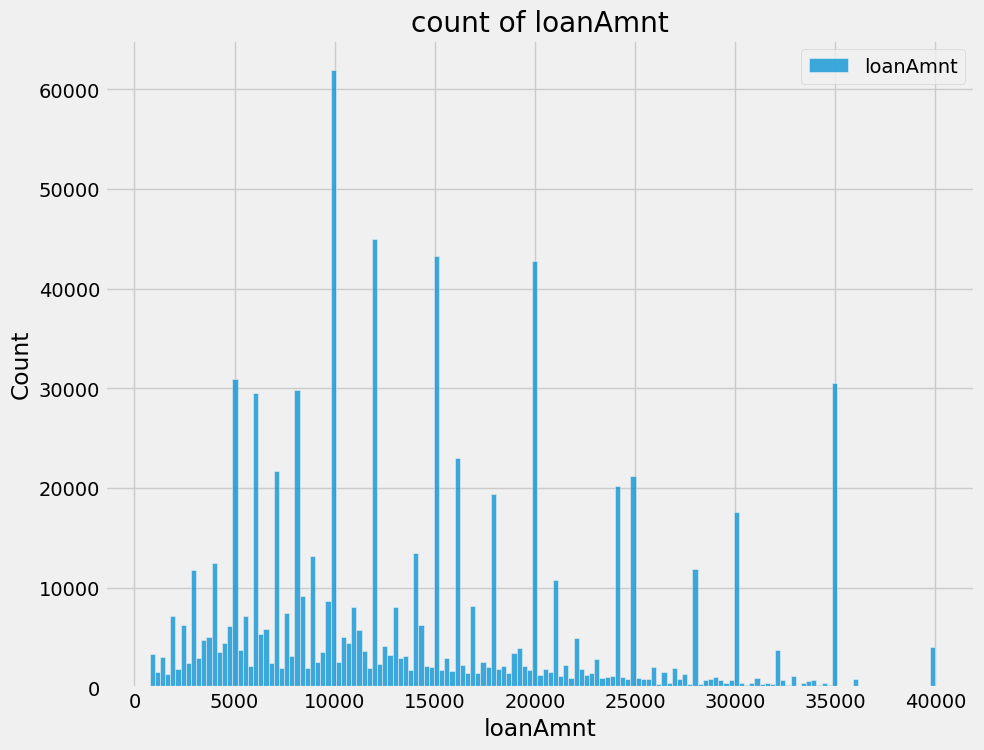

In [7]:
fig, ax = plt.subplots(figsize = (10,8))
sns.histplot(x = 'loanAmnt', data = train_df, ax = ax ,label = 'loanAmnt' )
ax.set_title(label = 'count of loanAmnt')
plt.legend()
plt.show()
plt.close()

## 1.2 term 贷款期限——定序
---从条形图可以看出，term = 3的占比更多

---在不同的term类别中，出现违约的情况中，term = 5时出现违约情况的占比更高

In [8]:
train_df['term'].value_counts()

3    606902
5    193098
Name: term, dtype: int64

In [9]:
temp_data_term = train_df.groupby(['term','isDefault'])['term'].count()

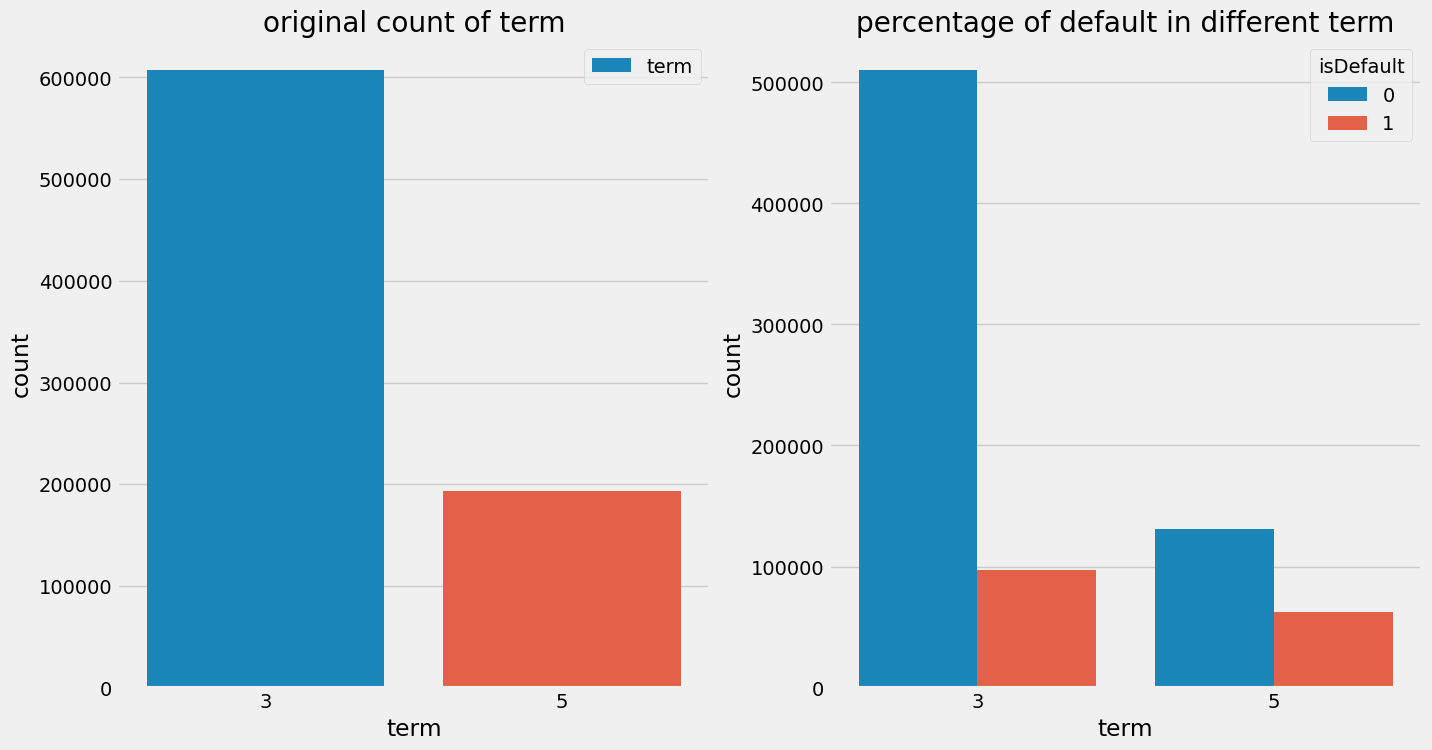

In [10]:
fig, ax = plt.subplots(1,2, figsize = (15,8))
sns.countplot(x = 'term', data = train_df, ax = ax[0], label = 'term')

ax[0].legend()
ax[0].set_title(label = "original count of term")

sns.countplot(x = 'term', data = train_df,hue='isDefault', ax = ax[1])
ax[1].set_title(label = "percentage of default in different term")
plt.show()
plt.close()

## 1.3 interestRate 贷款利率——定量
---interestRate 主要集中在[5-20]

In [11]:
train_df['interestRate'].value_counts()

10.99    22549
11.99    19674
13.99    17420
5.32     17033
9.17     15523
         ...  
17.54        1
24.59        1
17.03        1
15.13        1
14.28        1
Name: interestRate, Length: 641, dtype: int64

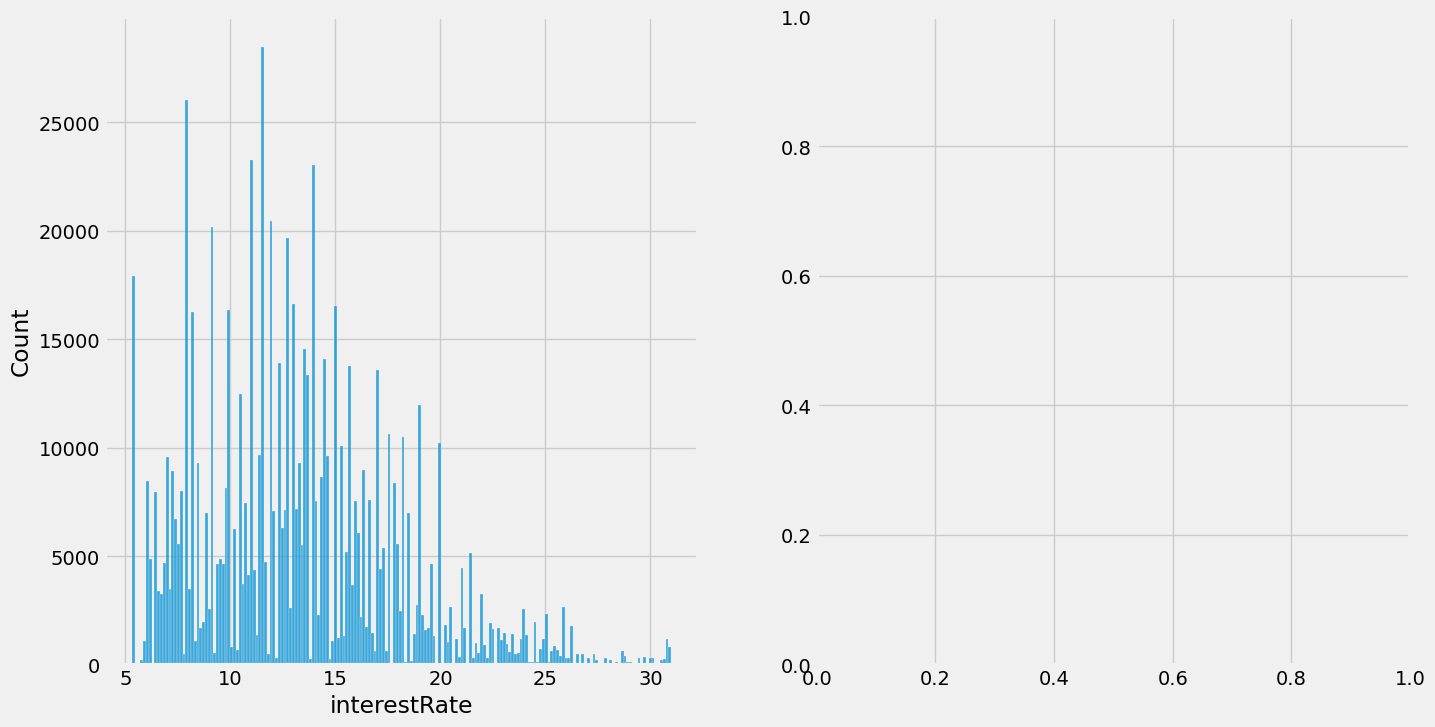

In [12]:
fig,ax = plt.subplots(1,2, figsize = (15, 8))
sns.histplot(data = train_df, x = 'interestRate', ax = ax[0])
plt.show()
plt.close()

## 1.3 installment  分期付款金额——定量
---installment 的分布图近似于正太分布，后续的特征工程可能需要对其做标准化

In [13]:
train_df['installment'].value_counts()

327.34     1843
301.15     1592
332.10     1543
318.79     1358
491.01     1245
           ... 
1036.79       1
699.99        1
490.96        1
277.97        1
523.99        1
Name: installment, Length: 72360, dtype: int64

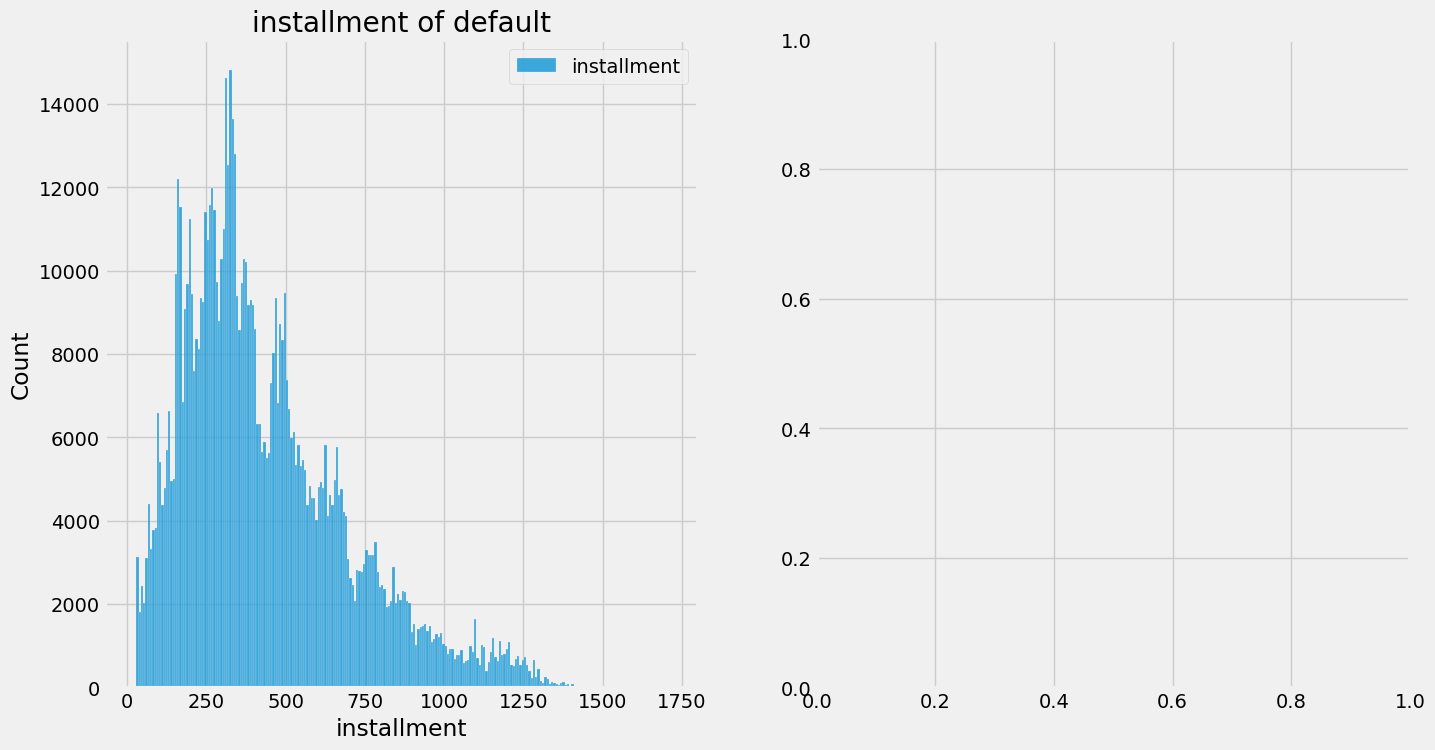

In [14]:
fig, ax = plt.subplots(1,2, figsize = (15,8))
sns.histplot(data = train_df, x = 'installment', ax = ax[0], label = "installment")
ax[0].legend()
ax[0].set_title(label = "installment of default")
plt.show()
plt.close()

## 1.4 grade 贷款等级——定序
---贷款等级中，B、C总数量最多。

---违约占比的情况中，按ABC顺序递减，按DEFG顺序依次递增，

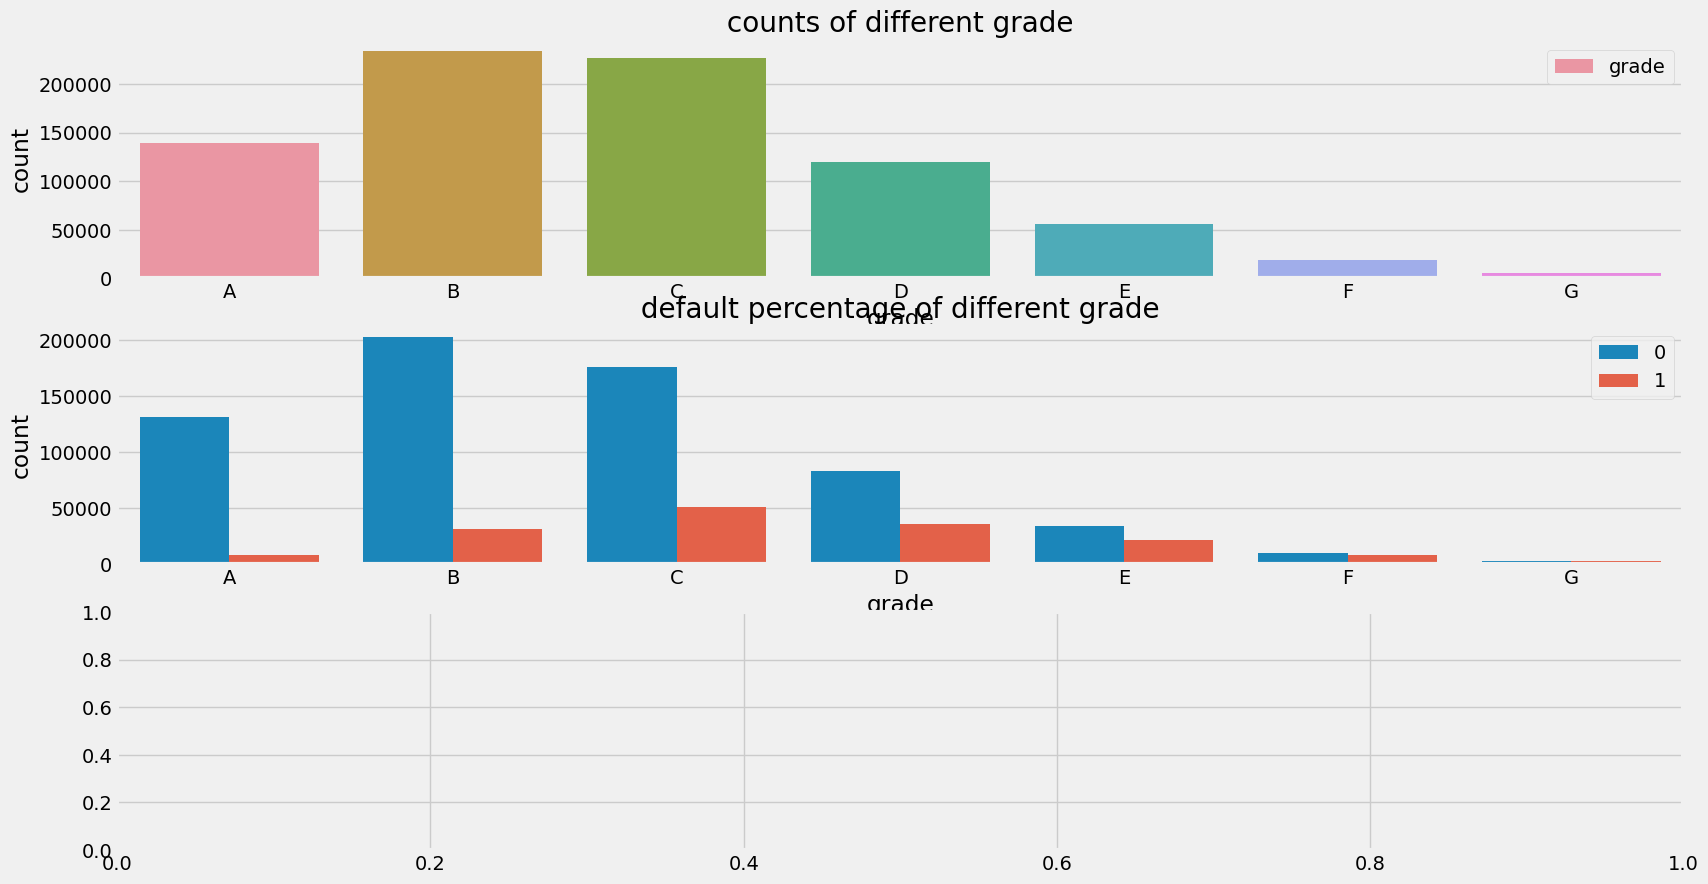

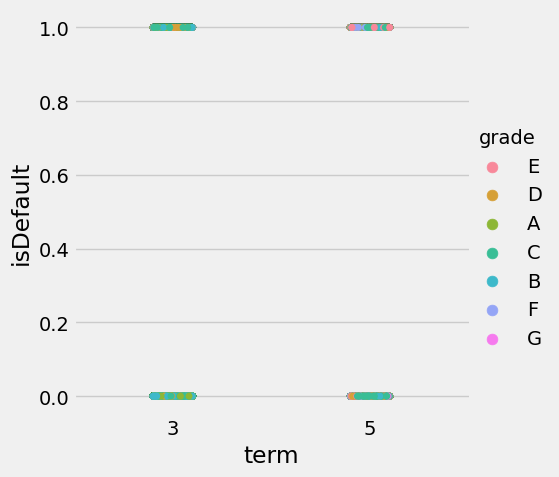

In [15]:
order_grade = train_df['grade'].value_counts().sort_index().index
fig,ax = plt.subplots(3,1, figsize = (18,10))
sns.countplot(data = train_df, x = 'grade', order = order_grade,label = "grade", ax = ax[0])
ax[0].legend()
ax[0].set_title(label = " counts of different grade ")

sns.countplot(data = train_df, x = 'grade', order = order_grade, hue = 'isDefault',ax = ax[1])
ax[1].legend()
ax[1].set_title(label = " default percentage of different grade ")

sns.catplot(x = 'term', y = 'isDefault', data = train_df,hue = 'grade',ax = ax[2])
plt.show()
plt.close()

## 1.5 subGrade 贷款等级之子级——定序

---subGrade和isDefault的相关性大致和grade类似

---subGrade和isDefault的相关性，按ABC依次递减，按DEFG依次递增 

In [16]:
train_df['subGrade'].value_counts()

C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: subGrade, dtype: int64

In [17]:
order_subGrade = train_df['subGrade'].value_counts().sort_index().index

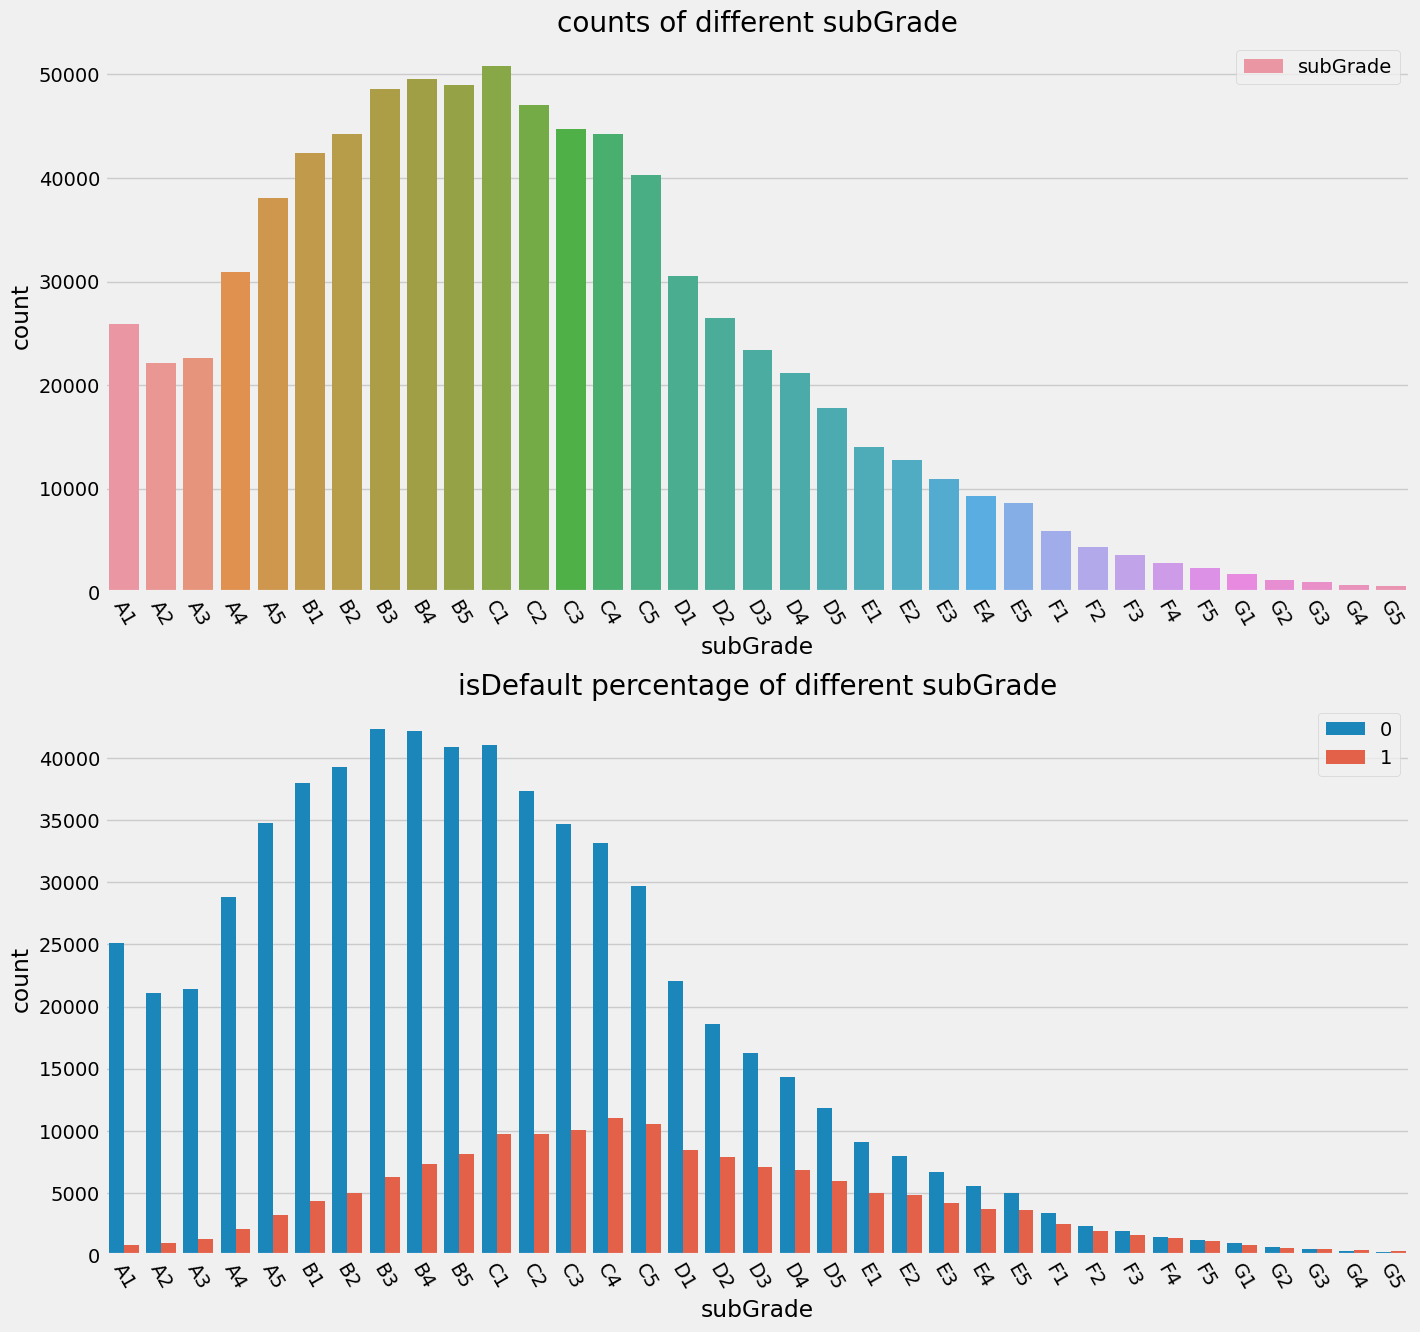

In [18]:
fig, ax = plt.subplots(2, 1, figsize = (15,15))
sns.countplot(data = train_df, x = 'subGrade',label = 'subGrade', order = order_subGrade,ax = ax[0])
ax[0].tick_params(axis = 'x',rotation = -60)
ax[0].set_title(label = "counts of different subGrade")
ax[0].legend()

sns.countplot(data = train_df, x = 'subGrade', hue = 'isDefault', order = order_subGrade,ax = ax[1])
ax[1].set_title(label = "isDefault percentage of different subGrade")
ax[1].tick_params(axis = 'x', rotation = -60)
ax[1].legend()
plt.show()
plt.close()

## 1.6 employmentTitle 就业职称——定量
---employmentTitle取值是实数，可能存在不同的职称有不同的数值，

---后续做完数据转换，可以再次查看以下频次直方图

In [19]:
train_df['employmentTitle'].value_counts().sort_index().index

Float64Index([     0.0,      1.0,      2.0,      3.0,      5.0,      6.0,
                   7.0,      8.0,      9.0,     10.0,
              ...
              378336.0, 378337.0, 378339.0, 378342.0, 378343.0, 378344.0,
              378346.0, 378347.0, 378350.0, 378351.0],
             dtype='float64', length=248683)

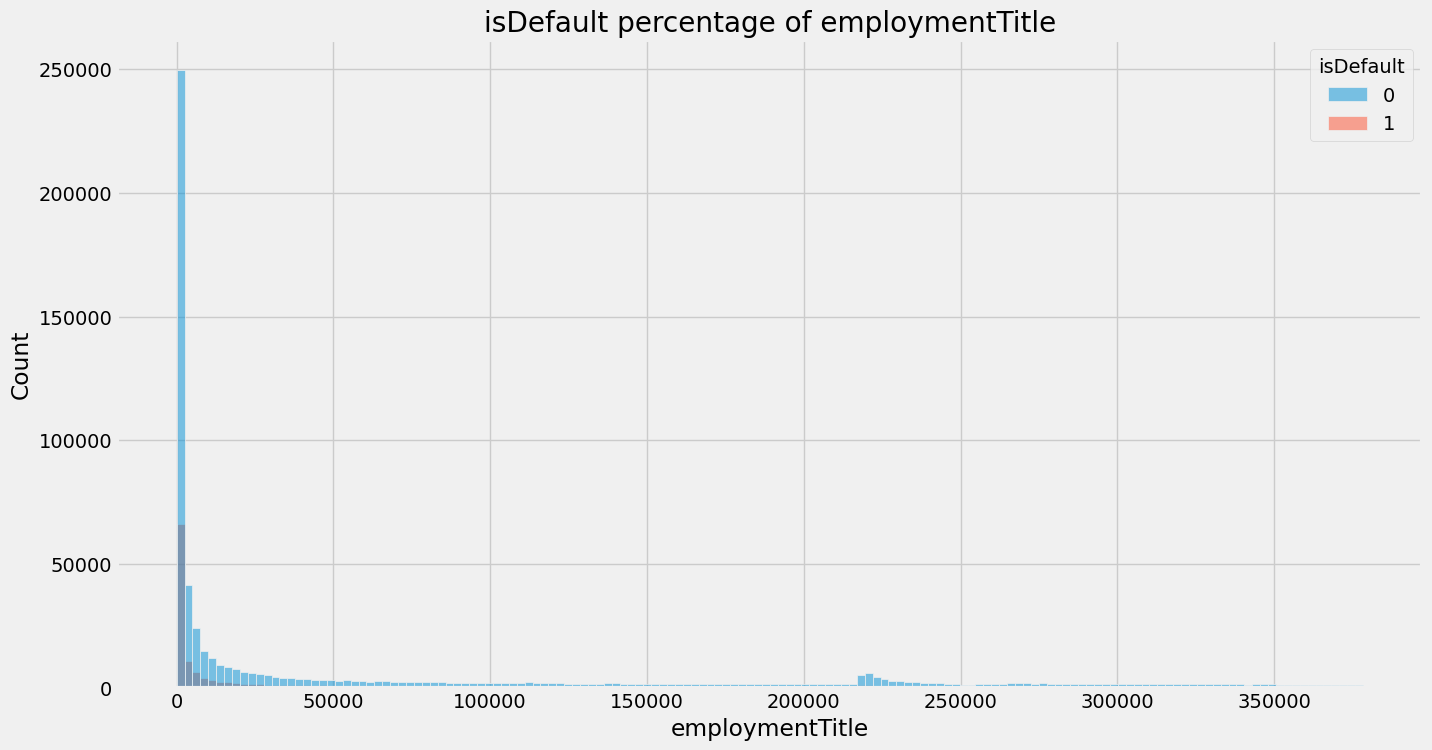

In [20]:
fig= plt.figure(figsize = (15, 8))
sns.histplot(data = train_df, x = 'employmentTitle',hue = 'isDefault')
plt.title(label = "isDefault percentage of employmentTitle")
plt.show()
plt.close()

## 1.6 employmentLength 就业年限——定序
---从绘图可以看出，不同的employmentLength中，违约占比在20%左右，初步猜测是否违约与就业年限关系不会很大

In [21]:
train_df['employmentLength'].value_counts()

10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: employmentLength, dtype: int64

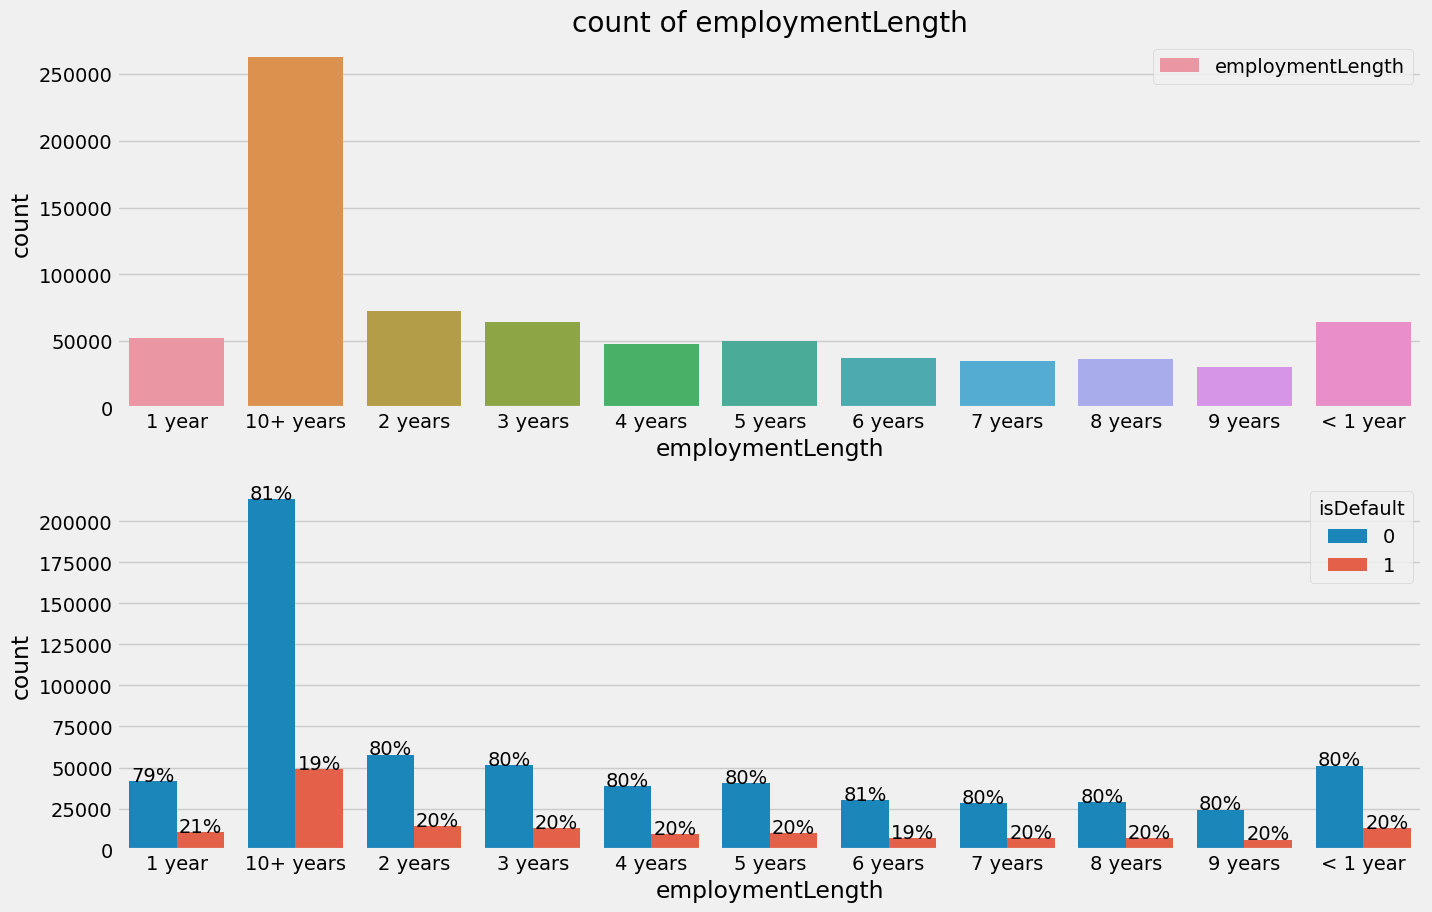

In [22]:
order_employmentLength = train_df['employmentLength'].value_counts().sort_index().index
fig, ax = plt.subplots(2,1,figsize = (15,10))
sns.countplot(data = train_df, x = 'employmentLength',label = "employmentLength", order = order_employmentLength,ax = ax[0])
ax[0].legend()
ax[0].set_title(label = "count of employmentLength")

sns.countplot(data = train_df, x = 'employmentLength',hue = 'isDefault',order = order_employmentLength, ax = ax[1])

bars = ax[1].patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax[1].text(left.get_x() + left.get_width()/2., height_l , '{0:.0%}'.format(height_l/total), ha="center")
    ax[1].text(right.get_x() + right.get_width()/2., height_r, '{0:.0%}'.format(height_r/total), ha="center")

plt.show()
plt.close()

## 1.7 homeOwnership 借款人在登记时提供的房屋所有权状况——定序
---房屋所有权的情况中，违约占比在20%上下

In [23]:
train_df['homeOwnership'].value_counts()

0    395732
1    317660
2     86309
3       185
5        81
4        33
Name: homeOwnership, dtype: int64

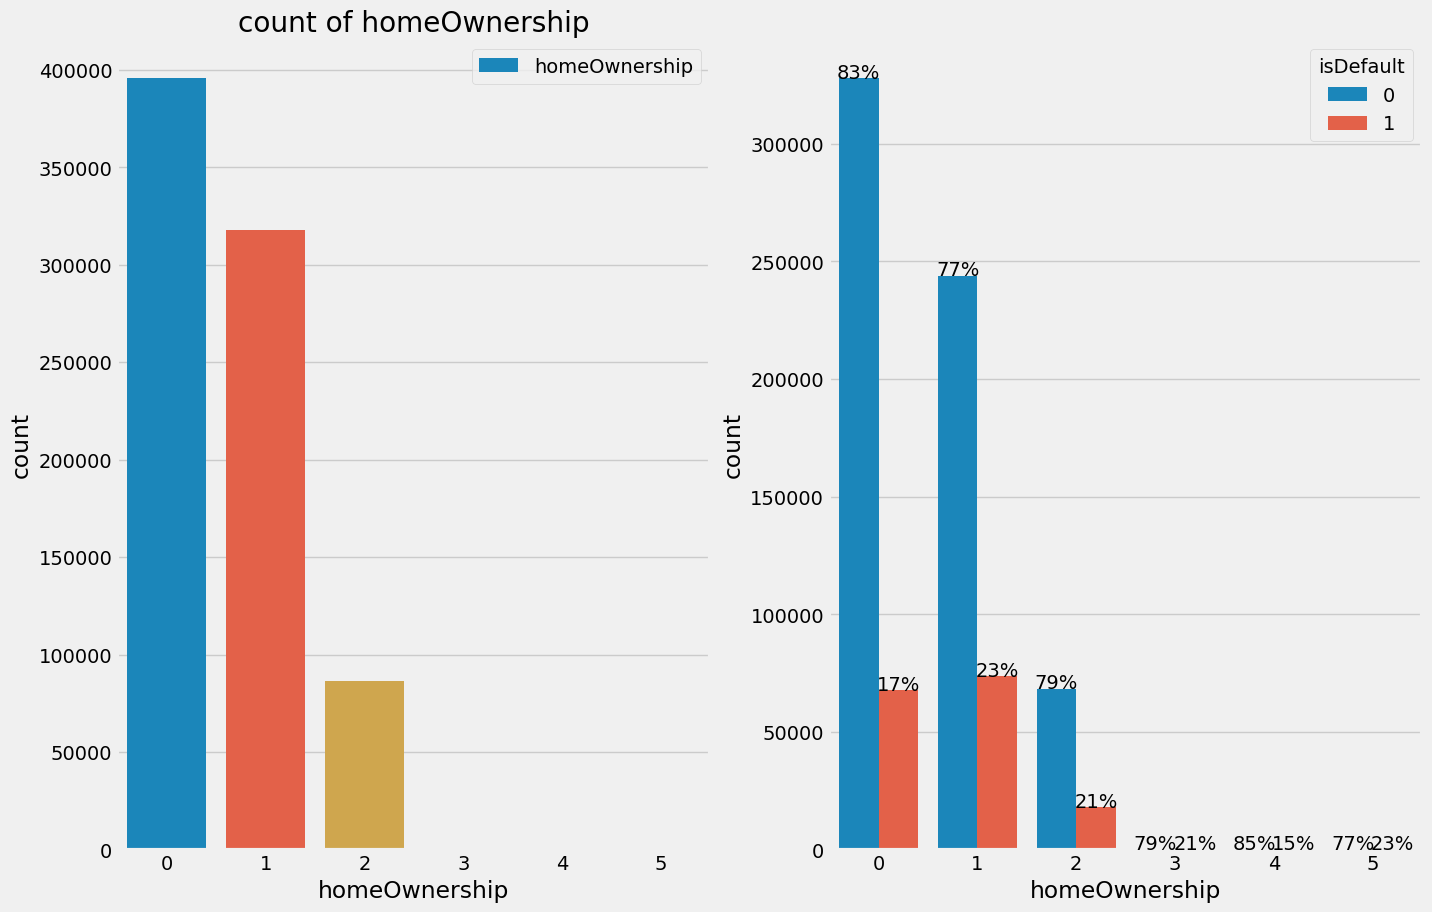

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (15,10))
sns.countplot(data = train_df, x = 'homeOwnership',label = "homeOwnership", ax = ax[0])
ax[0].set_title(label = "count of homeOwnership")
ax[0].legend()

sns.countplot(data = train_df, x = 'homeOwnership',hue = "isDefault", ax = ax[1])

bars = ax[1].patches
half = int(len(bars) / 2)
left_bars = bars[:half]
right_bars = bars[half:]

bars = ax[1].patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax[1].text(left.get_x() + left.get_width() / 2., left.get_height(),'{0:.0%}'.format(height_l/total), ha="center")
    ax[1].text(right.get_x() + right.get_width() / 2., right.get_height(),'{0:.0%}'.format(height_r/total), ha="center")
plt.show()
plt.close()

## 1.8 annualIncome 年收入——定量
---有数据统计和图示可以看出 ，年收入的范围非常大，如果该特征有用，则需要进行缩放

In [25]:
train_df['annualIncome'].value_counts().sort_index()

0.0           229
1.0             9
2.0             1
20.0            1
33.0            1
             ... 
8700000.0       1
8706582.0       1
9522972.0       1
9550000.0       1
10999200.0      1
Name: annualIncome, Length: 44926, dtype: int64

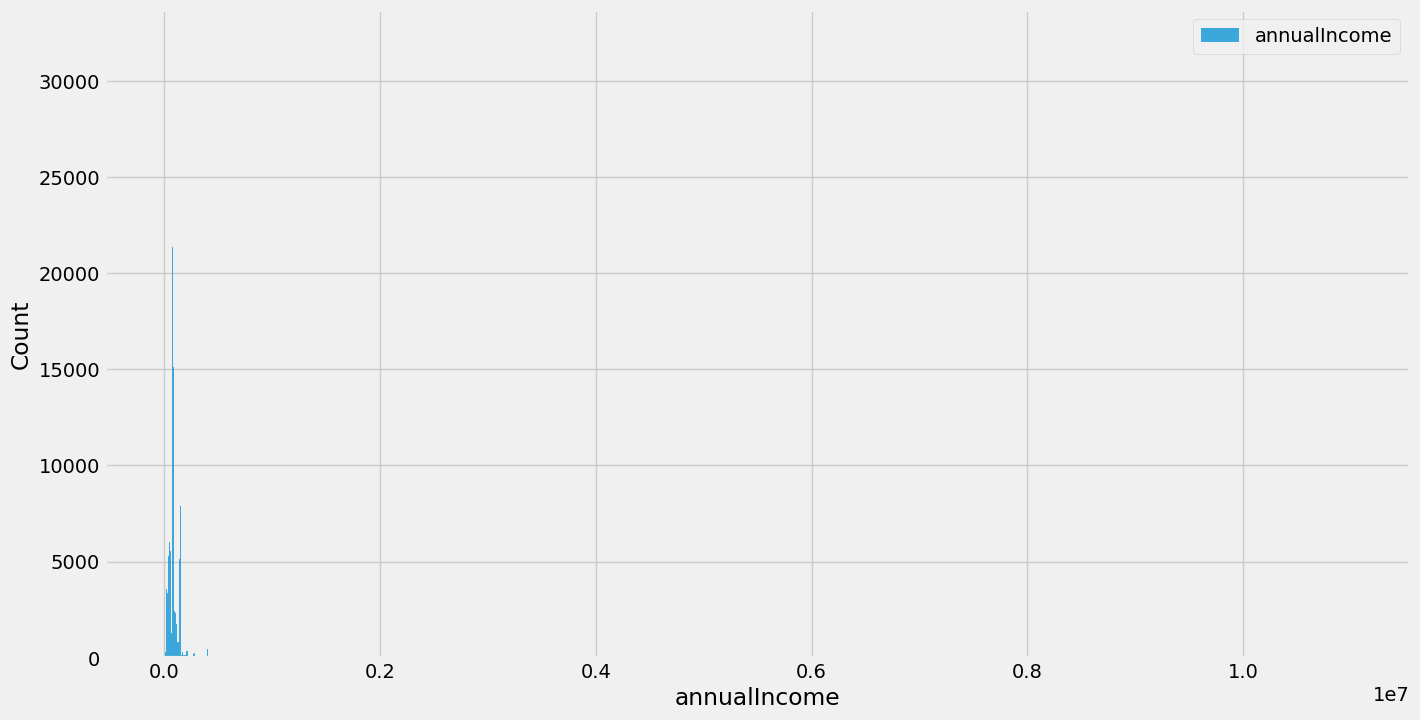

In [26]:
fig = plt.figure(figsize = (15,8))
sns.histplot(data = train_df, x = 'annualIncome', label = 'annualIncome')
plt.legend()
plt.show()
plt.close()

## 1.9 verificationStatus 验证状态——定类

---从数据看验证verificationStatus = 3的违约状态更多一点，

In [27]:
train_df['verificationStatus'].value_counts().sort_index().index

Int64Index([0, 1, 2], dtype='int64')

In [28]:
def PlotCount(ax):
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width() / 2., left.get_height(),'{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width() / 2., right.get_height(),'{0:.0%}'.format(height_r/total), ha="center")
    plt.show()
    plt.close()

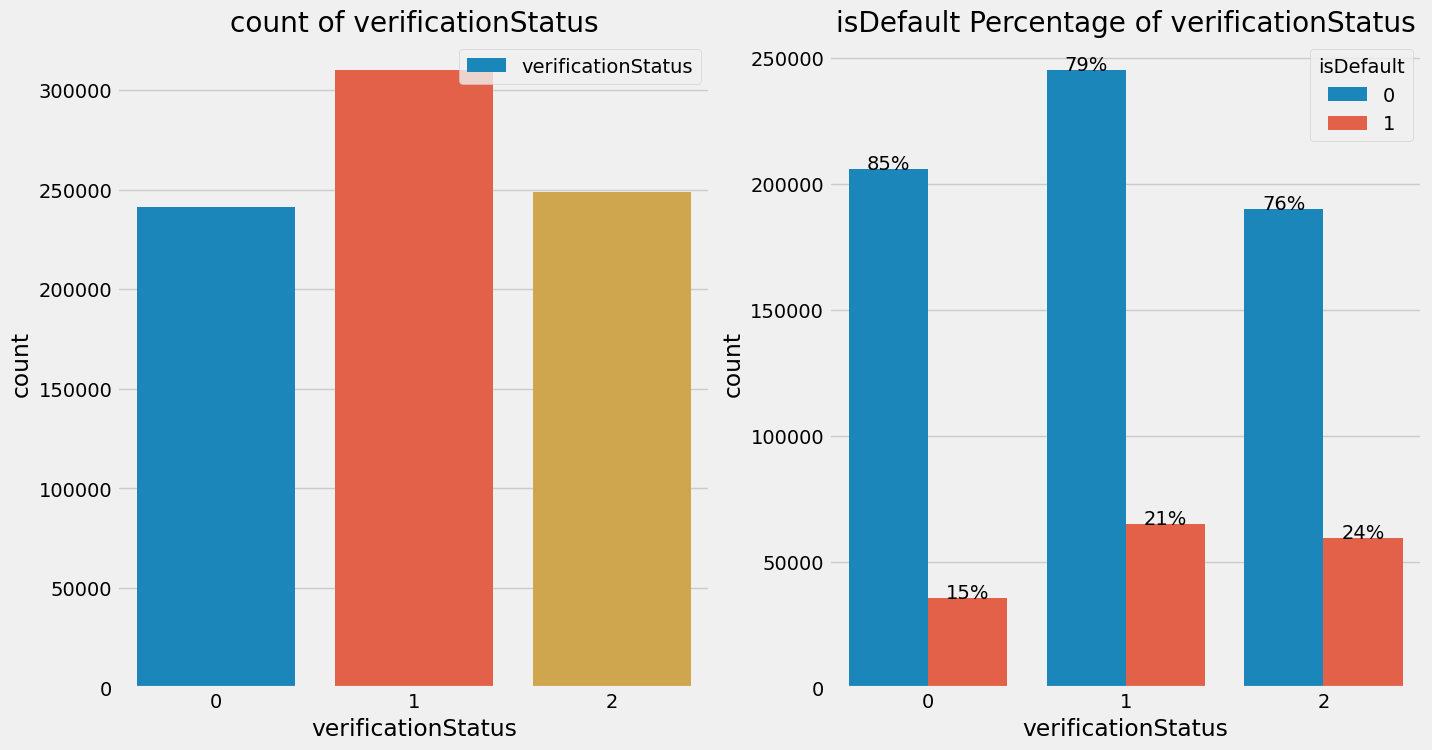

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (15,8))
sns.countplot(data = train_df, x = 'verificationStatus',ax = ax[0], label = 'verificationStatus')
ax[0].legend()
ax[0].set_title(label = "count of verificationStatus")

sns.countplot(data = train_df, x = 'verificationStatus', hue = 'isDefault', ax = ax[1])
ax[1].set_title(label = "isDefault Percentage of verificationStatus")

PlotCount(ax[1])

## 1.10 issueDate 贷款发放的月份——定类
---日期数据过多，初步只能可视化看个整体情况，后续可以细分为年 月，再进行可视化

In [30]:
train_df['issueDate'].value_counts()

2016-03-01    29066
2015-10-01    25525
2015-07-01    24496
2015-12-01    23245
2014-10-01    21461
              ...  
2007-08-01       23
2007-07-01       21
2008-09-01       19
2007-09-01        7
2007-06-01        1
Name: issueDate, Length: 139, dtype: int64

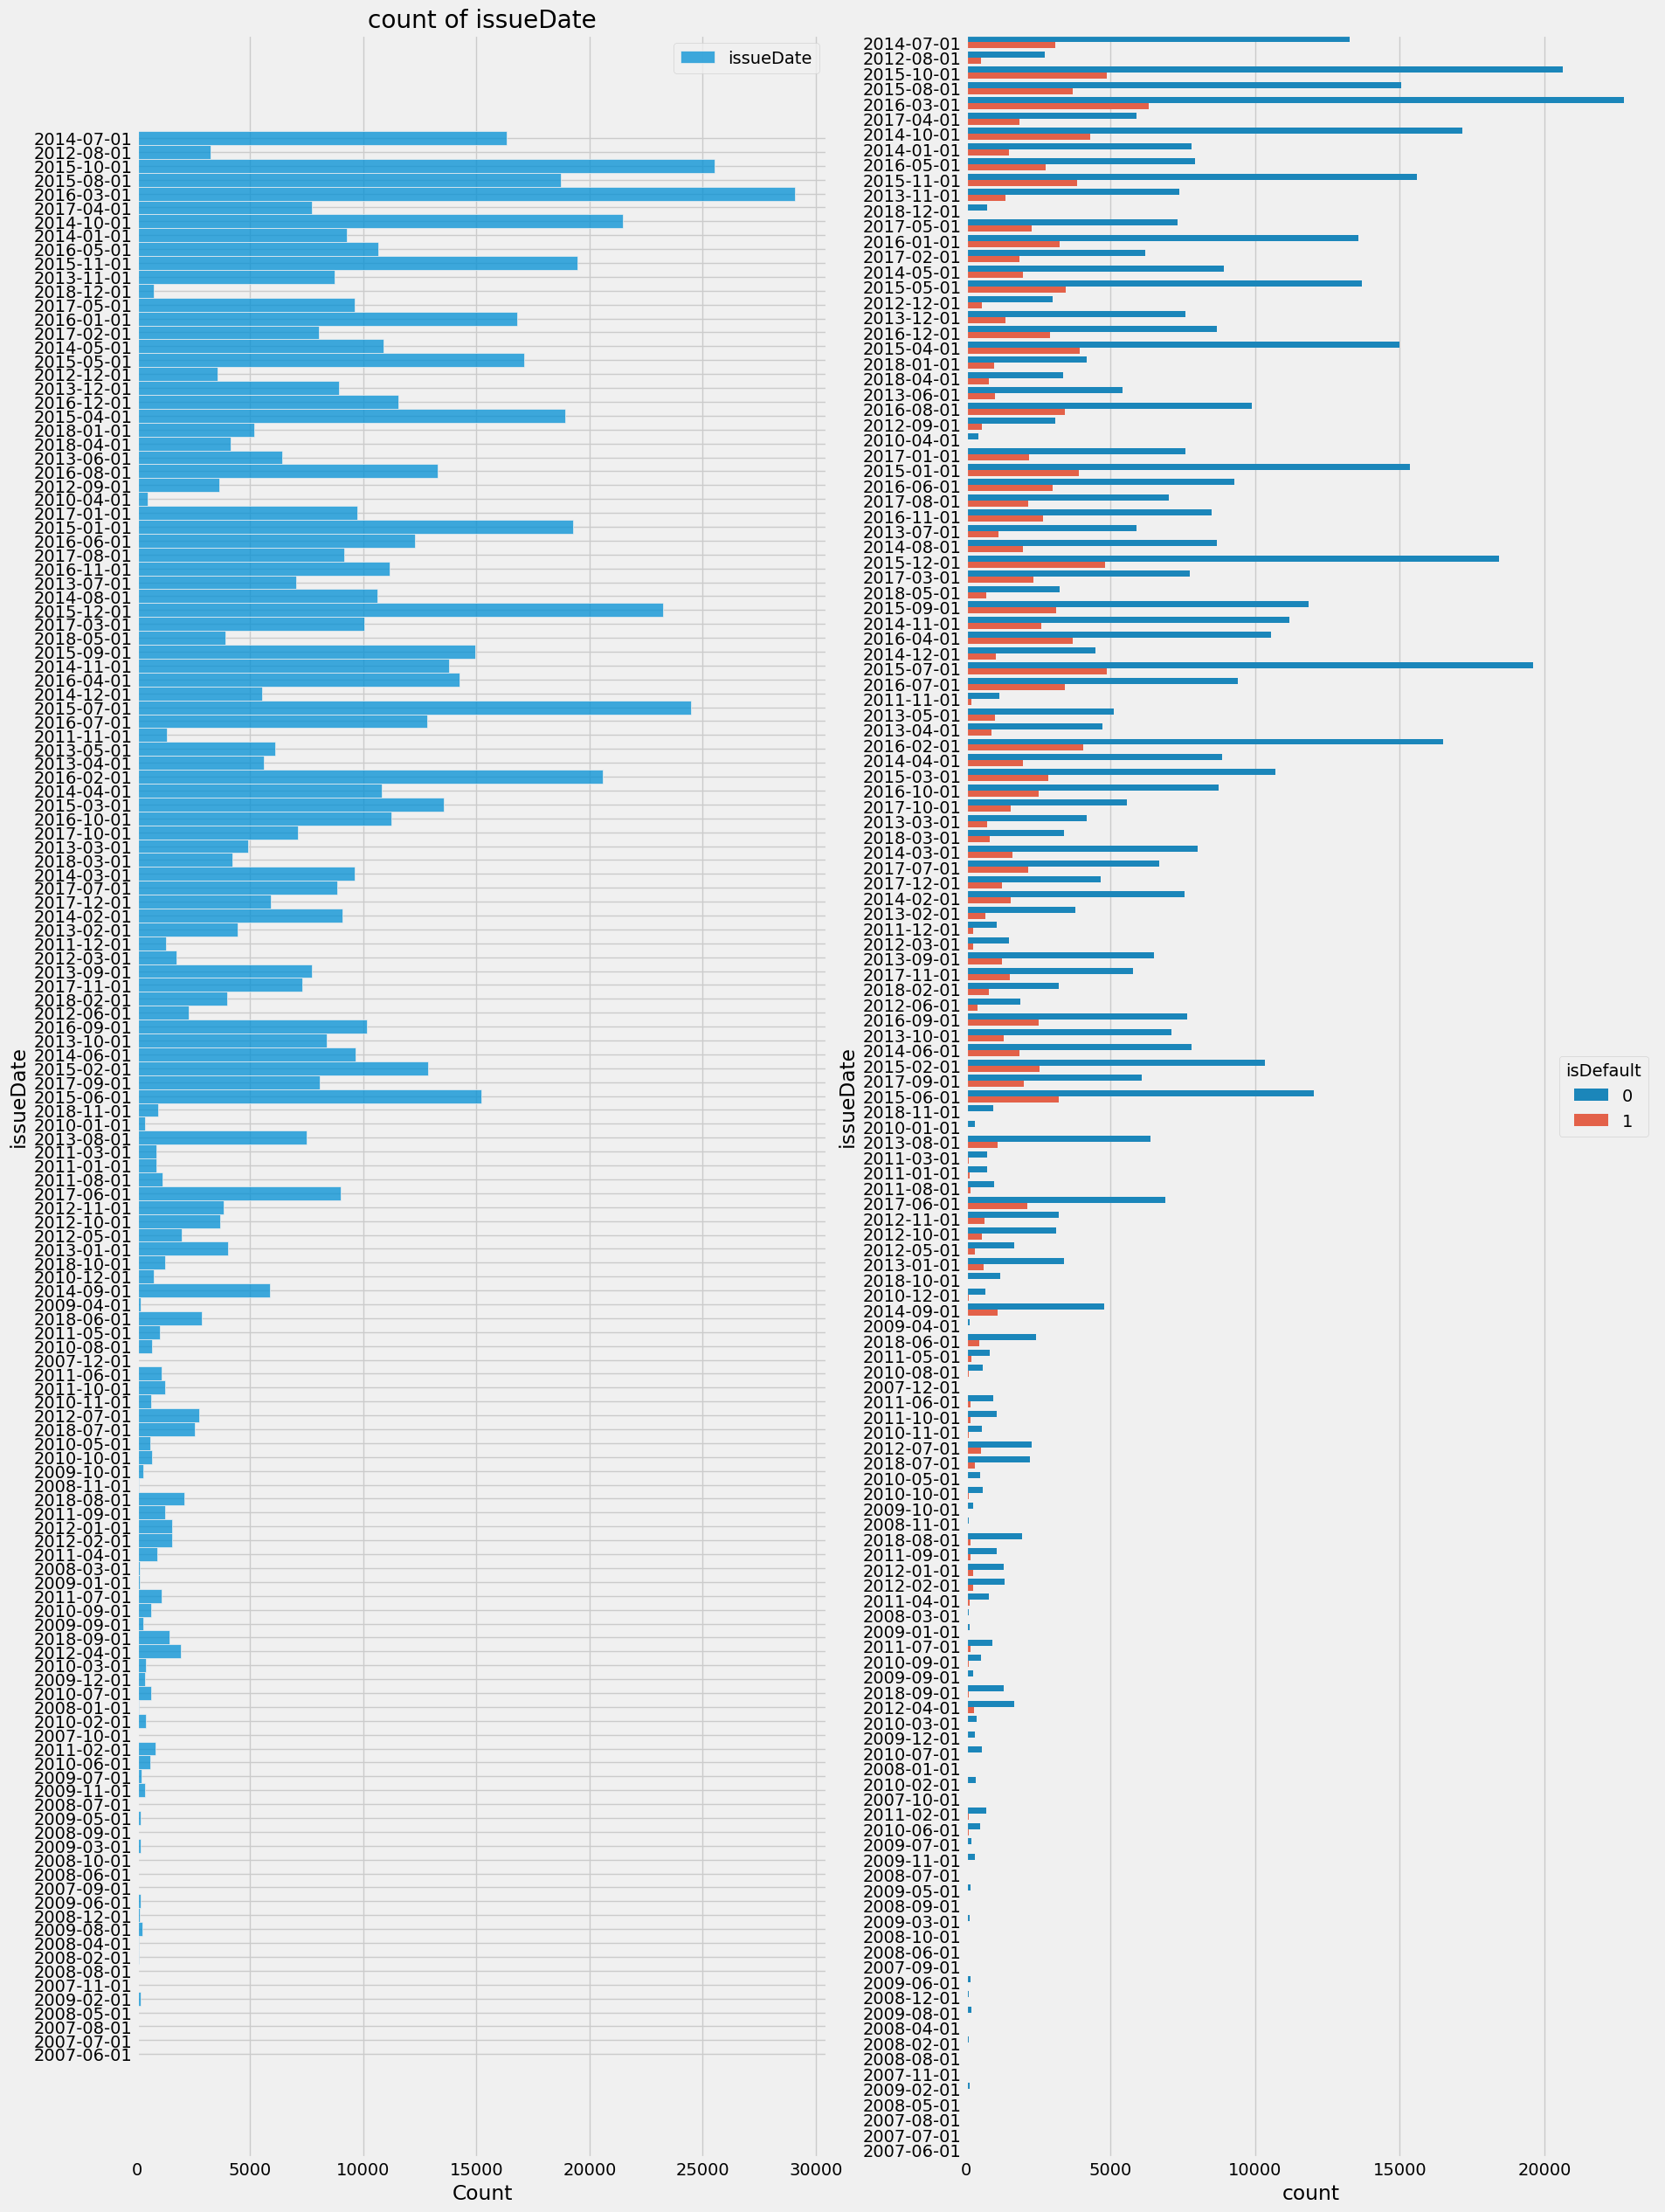

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (20, 30))
sns.histplot(data = train_df, y = 'issueDate',label = 'issueDate', ax = ax[0])
ax[0].legend()
ax[0].set_title(label = 'count of issueDate')
sns.countplot(data = train_df, y = 'issueDate',hue = 'isDefault',ax = ax[1])


plt.show()
plt.close()

## 1.11 purpose 贷款用途类别——定类
---不同的贷款类别，出现违约情况也不是很想他，训练集中比例在[0.15, 0.3]之间 

In [32]:
train_df['purpose'].value_counts()

0     464096
4     175433
2      52129
5      46276
3      17579
9       9238
1       9106
8       8657
10      5652
7       5373
6       4354
12      1363
11       554
13       190
Name: purpose, dtype: int64

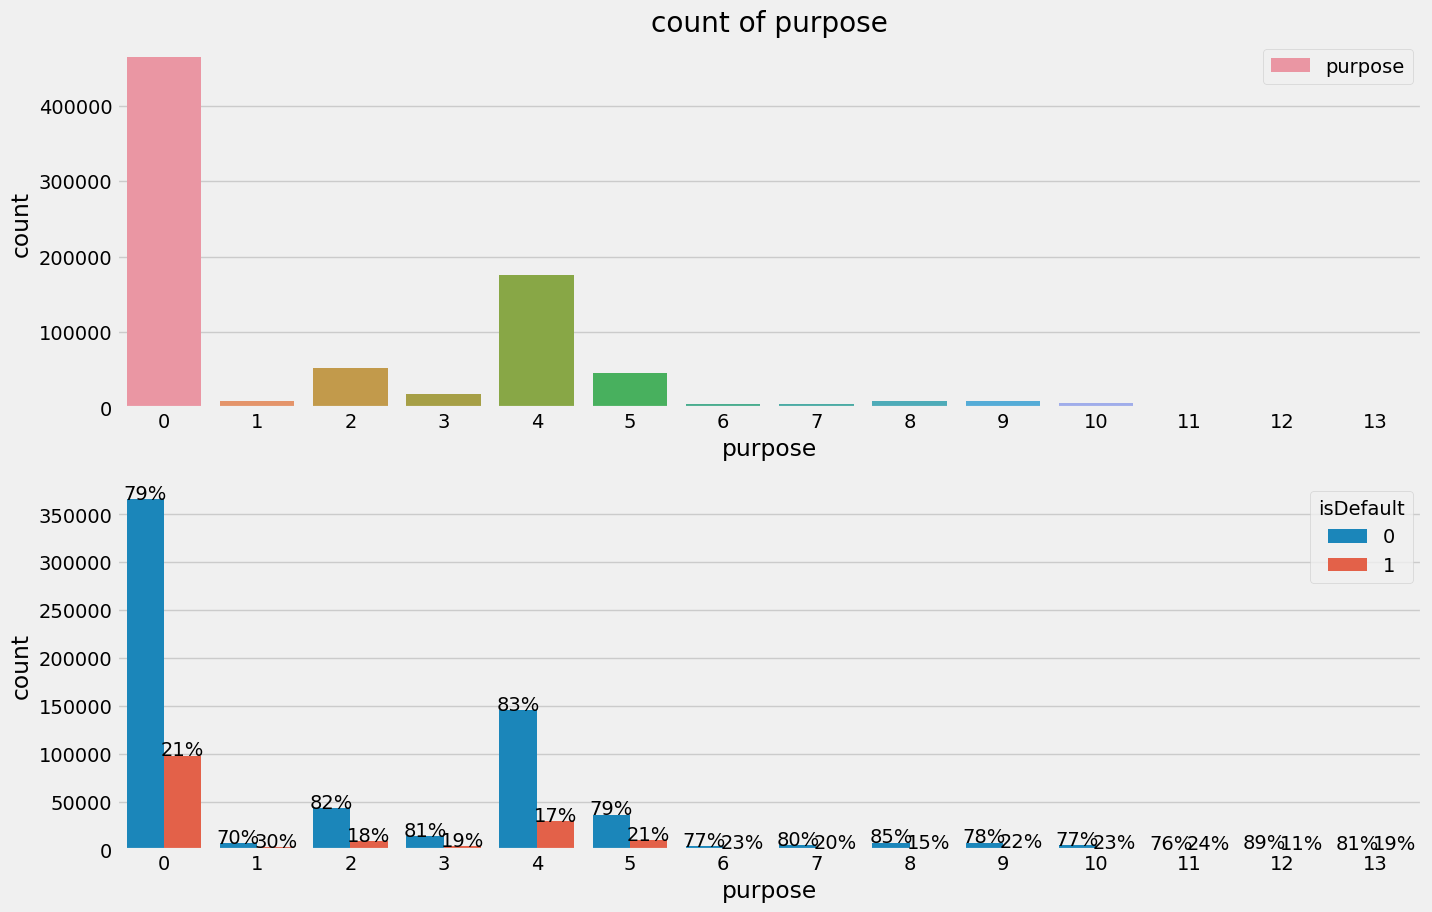

In [33]:
order_purpose = train_df['purpose'].value_counts().sort_index().index
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.countplot(data = train_df, x = 'purpose', ax = ax[0], label = "purpose")
ax[0].legend()
ax[0].set_title(label = "count of purpose")

sns.countplot(data = train_df, x = 'purpose', hue = 'isDefault',ax = ax[1])
ax[1].set_title(label = "")

PlotCount(ax[1])

## 1.12 postCode 邮编 ——定类
---邮编和地区关系紧密，从违约比中可以看出各个地区的经济情况，是个比较重要的特征

In [34]:
train_df['postCode'].value_counts()

134.0    8956
19.0     8611
51.0     8161
31.0     7337
4.0      7176
         ... 
884.0       1
839.0       1
858.0       1
937.0       1
935.0       1
Name: postCode, Length: 932, dtype: int64

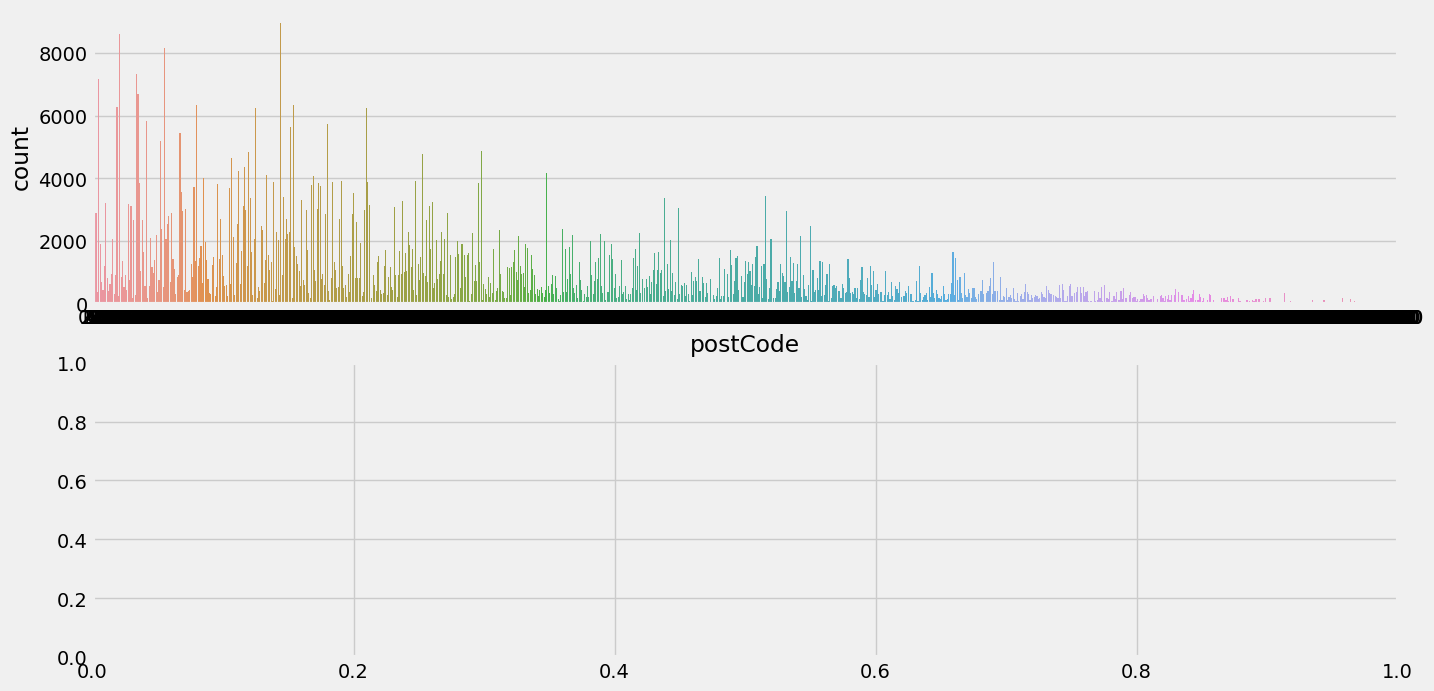

In [35]:
fig,ax = plt.subplots(2, 1, figsize = (15,8))
sns.countplot(x = 'postCode', data = train_df, label = 'postCode', ax = ax[0])
plt.show()
plt.close()

## 1.13 regionCode 地区编码 ——定类
---

In [36]:
train_df['regionCode'].value_counts()

8     116921
14     65768
13     65041
21     56671
2      30513
30     28634
0      27180
19     26198
3      25766
9      22902
7      22600
23     20919
10     19604
12     18543
26     18432
22     17722
18     17286
4      14177
11     12929
24     12776
32     12065
38     11982
36     11644
27     10521
17      9863
35      9669
5       9581
20      9124
43      7701
42      7267
15      6690
37      5998
45      5932
16      4325
28      4036
44      3963
33      3817
6       3496
39      2943
40      2287
31      2261
34      2136
25      2102
48      1880
41      1778
1       1624
29      1560
47      1213
49      1001
46       953
50         6
Name: regionCode, dtype: int64

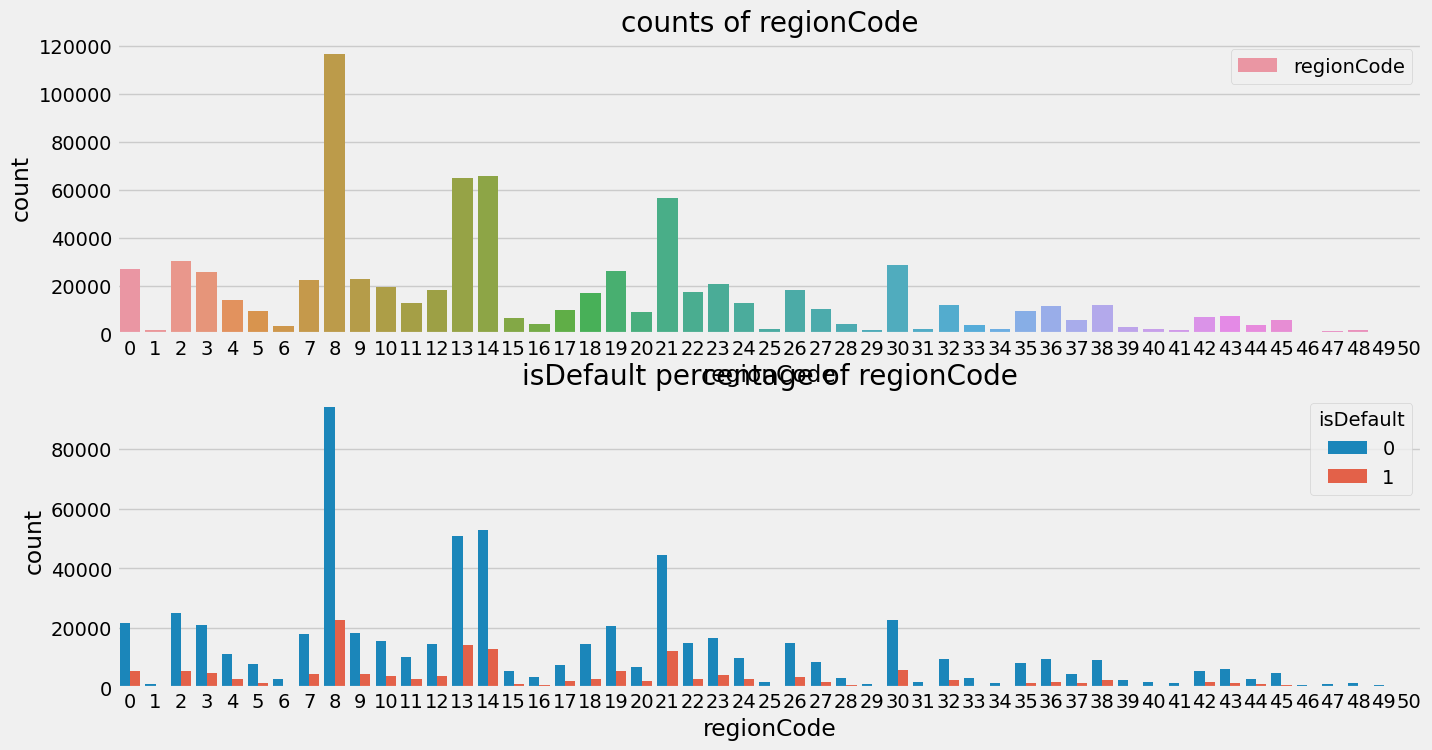

In [37]:
fig, ax = plt.subplots(2,1,figsize = (15, 8))
sns.countplot(x = 'regionCode',data = train_df, label = 'regionCode', ax = ax[0])
ax[0].legend()
ax[0].set_title(label = "counts of regionCode")

sns.countplot(x = 'regionCode', data = train_df, hue = 'isDefault', ax = ax[1])
ax[1].set_title(label = "isDefault percentage of regionCode")
plt.show()
plt.close()


## 1.14 dti 债务收入比——定量

In [38]:
train_df['dti'].value_counts()

19.20     593
18.00     585
13.20     570
16.80     564
14.40     554
         ... 
76.24       1
47.96       1
195.72      1
62.51       1
41.83       1
Name: dti, Length: 6321, dtype: int64

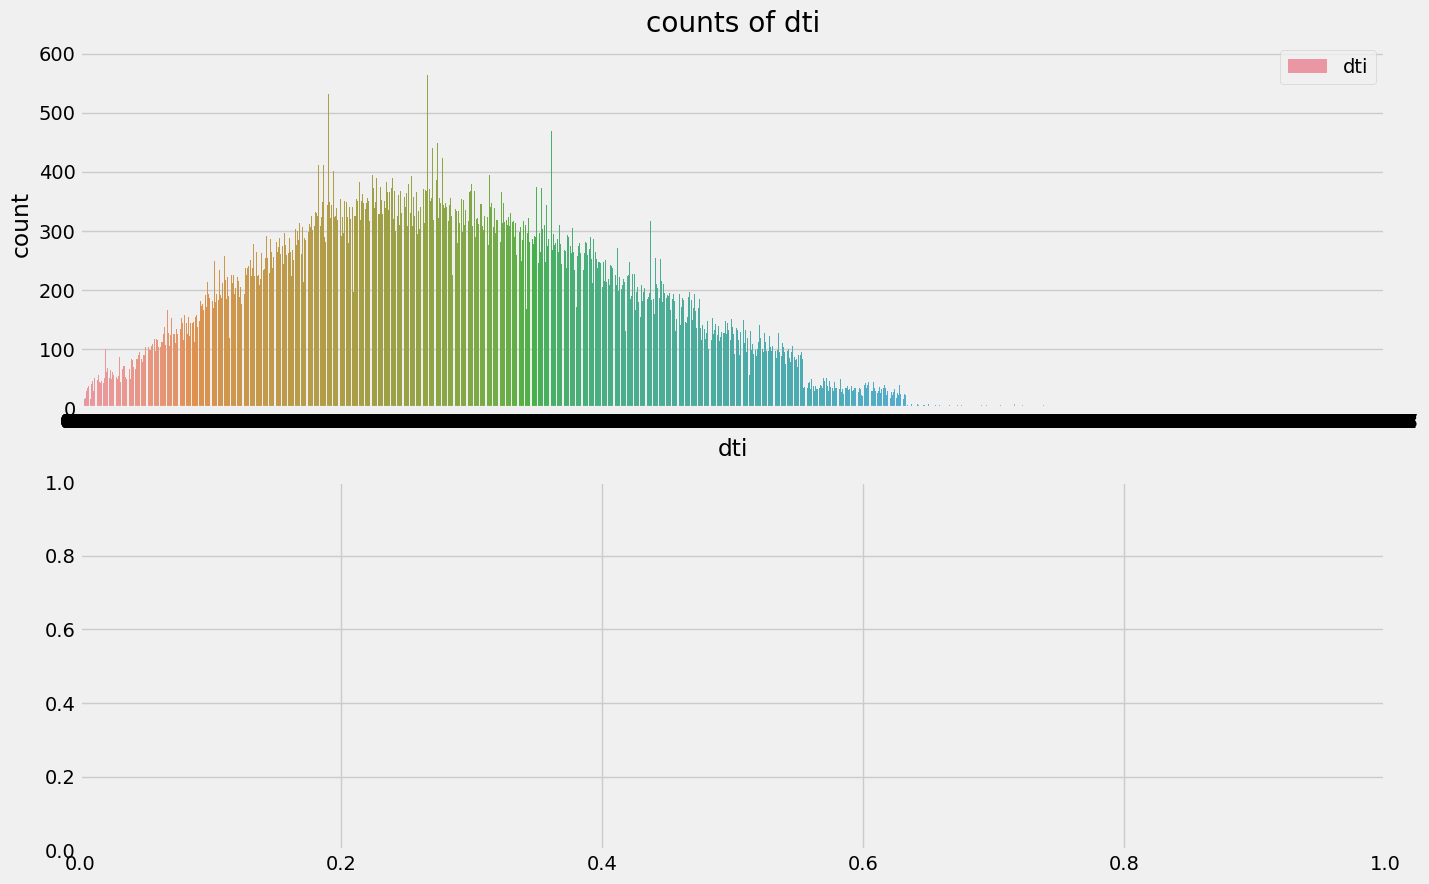

In [39]:
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.countplot(x = 'dti', data = train_df, label = "dti", ax = ax[0])
ax[0].legend()
ax[0].set_title(label = 'counts of dti')
plt.show()
plt.close()

## 1.15 delinquency_2years 借款人过去2年信用档案中逾期30天以上的违约事件数——定量

In [40]:
train_df['delinquency_2years'].value_counts()

0.0     645715
1.0     102586
2.0      29944
3.0      10919
4.0       4808
5.0       2504
6.0       1399
7.0        770
8.0        443
9.0        293
10.0       192
11.0       144
12.0        86
14.0        53
13.0        50
15.0        23
16.0        20
18.0        13
19.0        10
20.0         7
17.0         6
22.0         3
21.0         3
29.0         2
26.0         2
25.0         1
27.0         1
39.0         1
30.0         1
24.0         1
Name: delinquency_2years, dtype: int64

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values


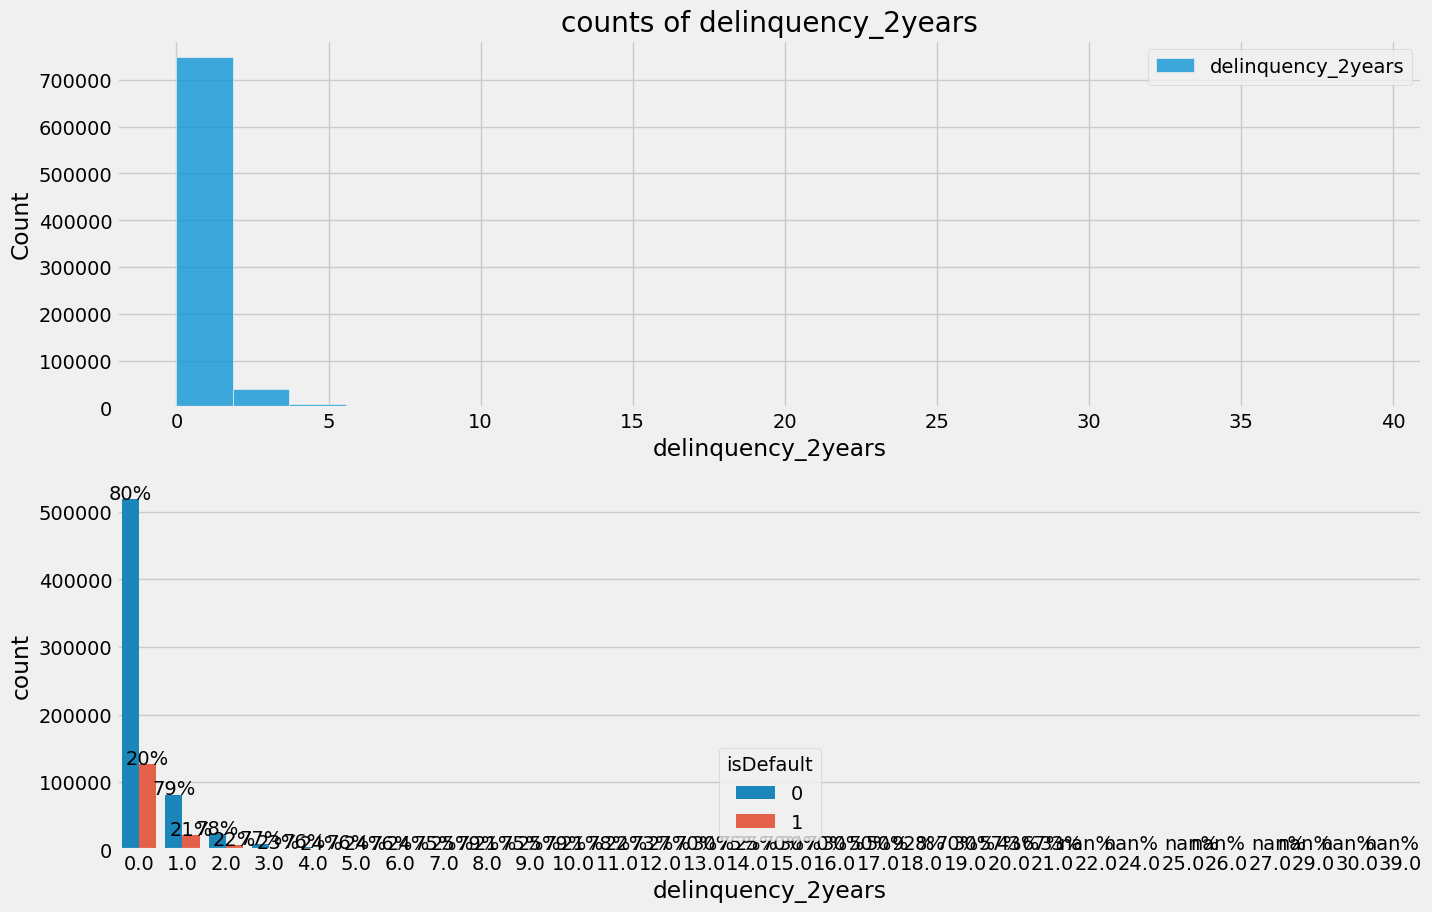

In [41]:
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.histplot(x = 'delinquency_2years', data = train_df, label = 'delinquency_2years', ax = ax[0])
ax[0].legend()
ax[0].set_title(label = "counts of delinquency_2years")

sns.countplot(x = 'delinquency_2years', data = train_df, orient='v',hue = 'isDefault',ax = ax[1])

PlotCount(ax[1])

## 1.16 ficoRangeLow 贷款发放时的fico所属的下限范围——定量

In [42]:
train_df['ficoRangeLow'].value_counts()

660.0    71974
670.0    69815
665.0    69619
675.0    61993
680.0    61294
685.0    53668
690.0    52046
695.0    47065
700.0    43292
705.0    39030
710.0    34296
715.0    30154
720.0    26036
725.0    20766
730.0    18186
735.0    14377
740.0    12585
745.0    10336
750.0     9419
755.0     8191
760.0     6716
765.0     6163
770.0     5311
775.0     4882
780.0     4286
785.0     3476
790.0     3284
795.0     2637
800.0     2261
805.0     1942
810.0     1408
815.0     1111
820.0      827
825.0      636
830.0      412
835.0      249
840.0      140
845.0      116
630.0        1
Name: ficoRangeLow, dtype: int64

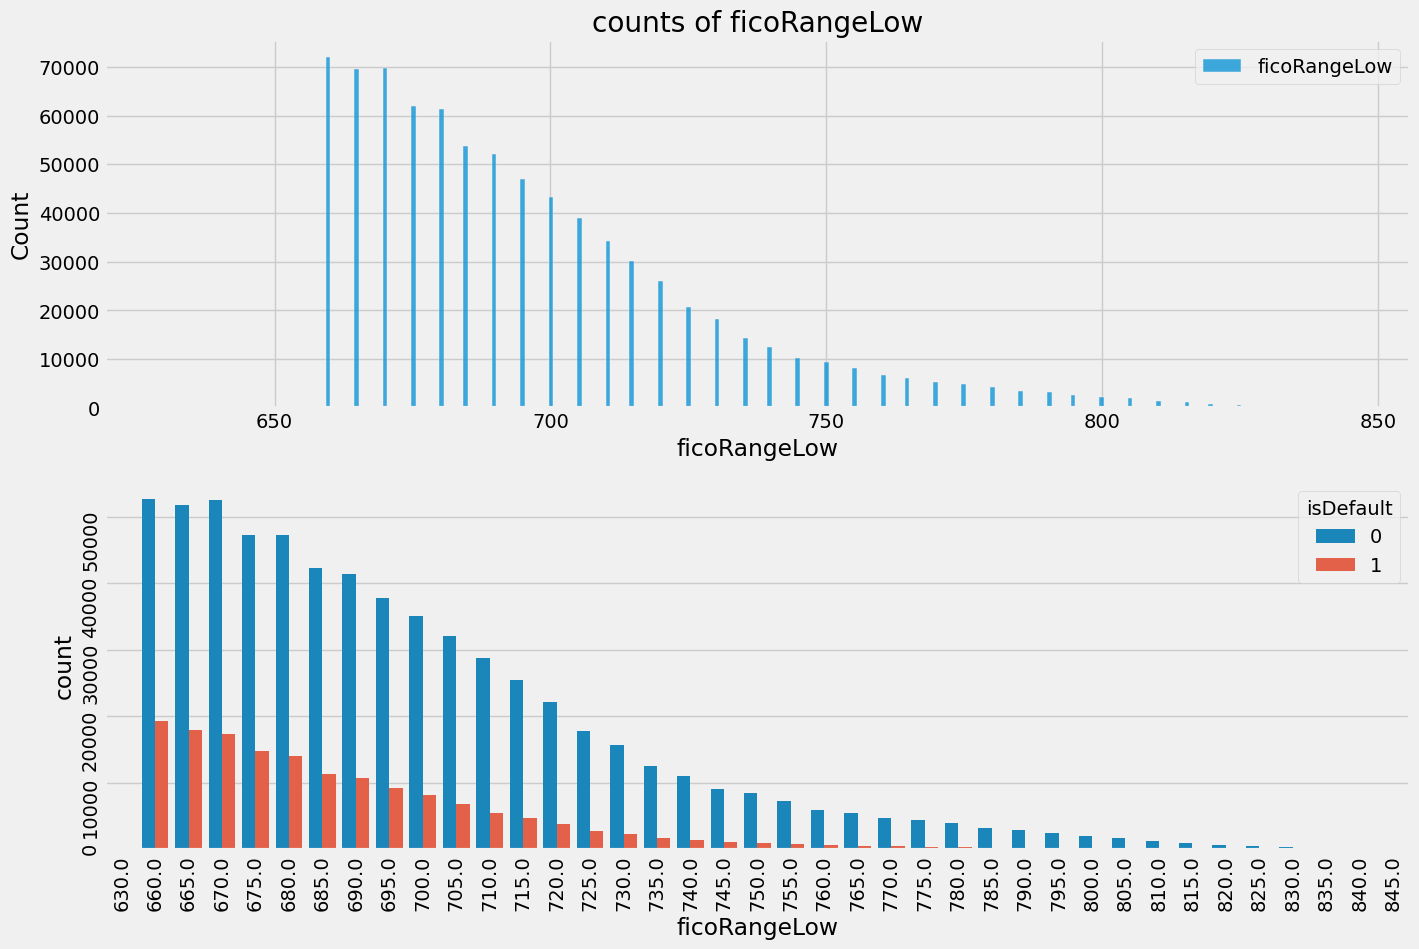

In [43]:
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.histplot(x = 'ficoRangeLow', data = train_df, label = "ficoRangeLow", ax = ax[0])
ax[0].legend()
ax[0].set_title(label = "counts of ficoRangeLow")

sns.countplot(x = 'ficoRangeLow', data = train_df, hue ='isDefault', ax = ax[1])
ax[1].tick_params(rotation = 90)
plt.show()
plt.close()

## 1.18 openAcc 信用档案中未结信用额度的数量——定量

In [44]:
train_df['openAcc'].value_counts()

9.0     70865
10.0    69171
8.0     68201
11.0    64069
7.0     61355
        ...  
82.0        1
81.0        1
86.0        1
74.0        1
67.0        1
Name: openAcc, Length: 75, dtype: int64

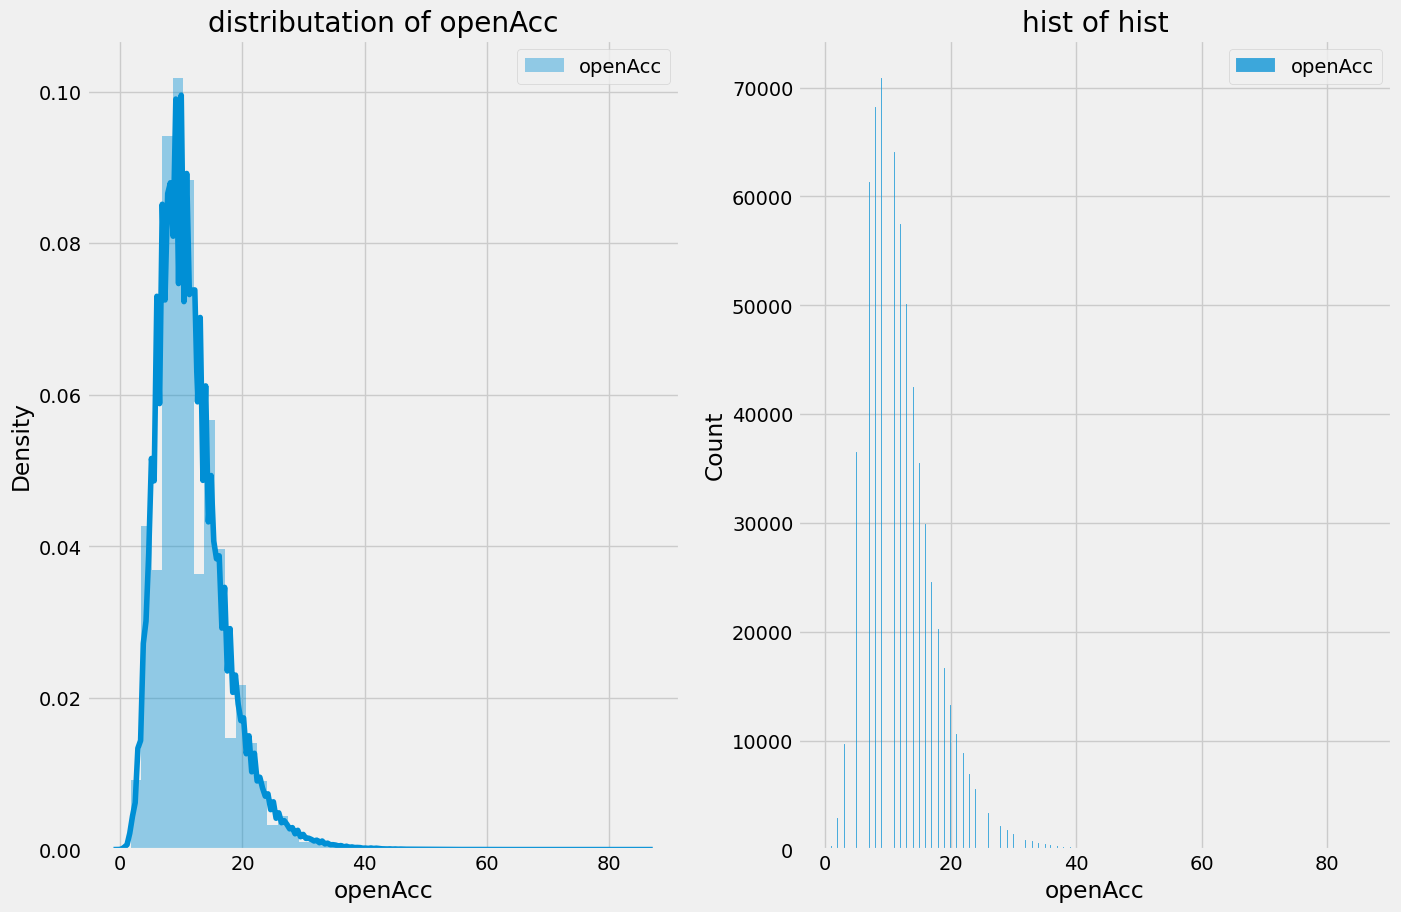

In [45]:
fig, ax= plt.subplots(1, 2, figsize = (15, 10))
sns.distplot(train_df['openAcc'], label = 'openAcc', ax = ax[0])
ax[0].legend()
ax[0].set_title(label = 'distributation of openAcc')

sns.histplot(x = 'openAcc', data = train_df,label = 'openAcc', ax = ax[1])
ax[1].legend()
ax[1].set_title(label = "hist of hist")
plt.show()
plt.close()

##  1.19 pubRec 贬损公共记录的数量——定量


In [46]:
train_df['pubRec'].value_counts()

0.0     664765
1.0     113186
2.0      14520
3.0       4432
4.0       1535
5.0        757
6.0        367
7.0        165
8.0        105
9.0         51
10.0        37
11.0        23
12.0        14
15.0         7
13.0         6
16.0         4
18.0         4
22.0         2
24.0         2
19.0         2
21.0         2
20.0         2
14.0         2
49.0         2
63.0         1
46.0         1
28.0         1
86.0         1
54.0         1
40.0         1
47.0         1
17.0         1
Name: pubRec, dtype: int64

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be finite values

posx and posy should be f

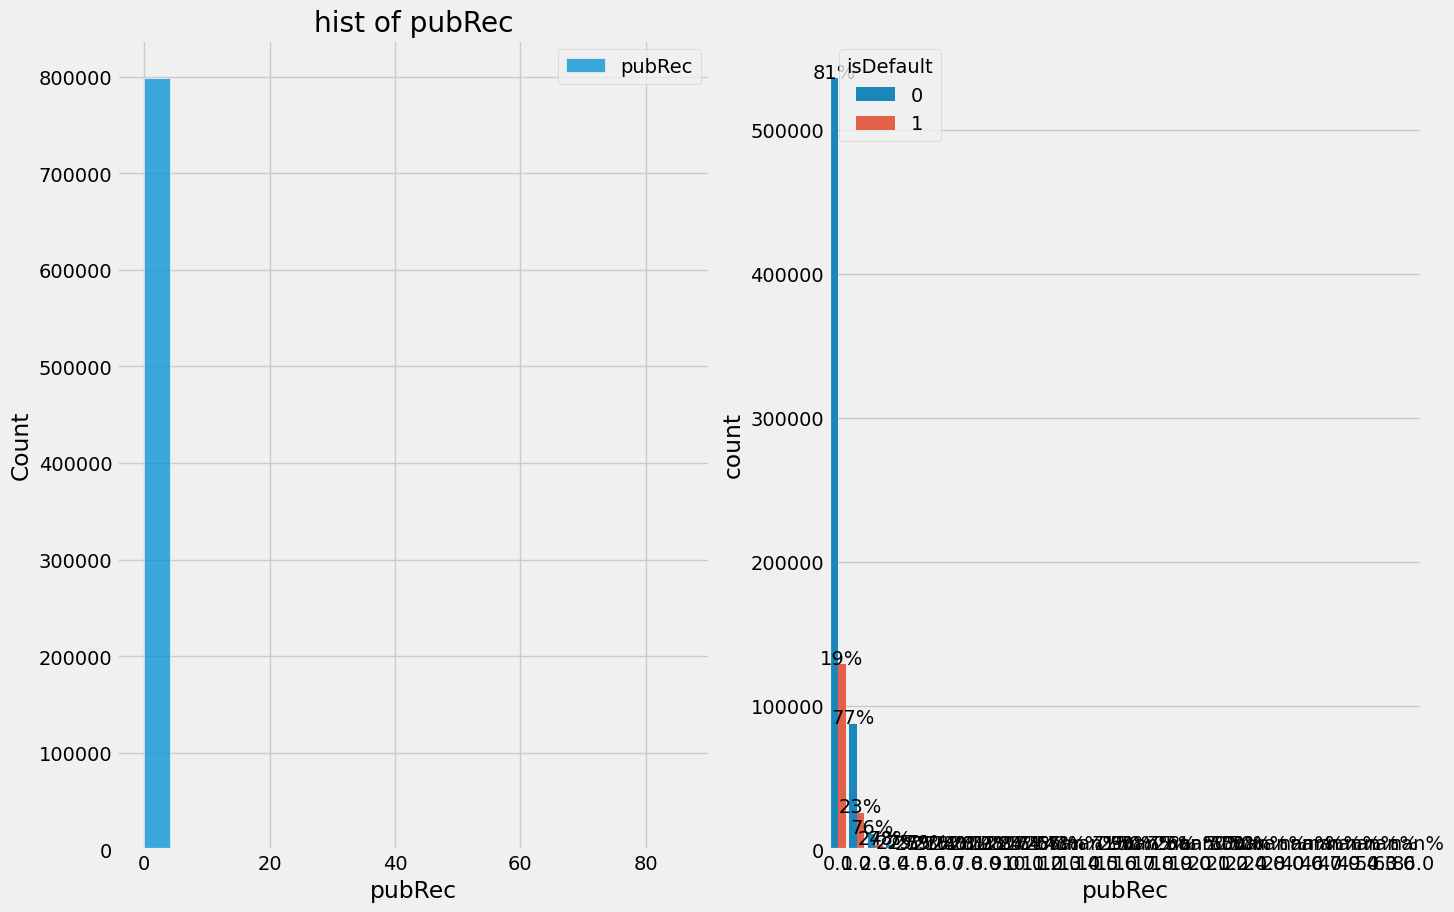

In [47]:
fig, ax = plt.subplots(1, 2, figsize =(15, 10))
sns.histplot(x = 'pubRec', data = train_df, label = 'pubRec', ax = ax[0])
ax[0].legend()
ax[0].set_title(label = "hist of pubRec")

sns.countplot(x = 'pubRec',data = train_df,hue = 'isDefault',  ax = ax[1])
PlotCount(ax[1])

In [48]:
train_df[train_df['pubRec'] == 0.0]['pubRec']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
799995    0.0
799996    0.0
799997    0.0
799998    0.0
799999    0.0
Name: pubRec, Length: 664765, dtype: float64

## 1.20 pubRecBankruptcies 公开记录清除的数量——定量

In [49]:
train_df['pubRecBankruptcies'].value_counts()

0.0     700076
1.0      93639
2.0       4566
3.0        945
4.0        248
5.0         80
6.0         23
7.0         11
9.0          3
8.0          3
12.0         1
Name: pubRecBankruptcies, dtype: int64

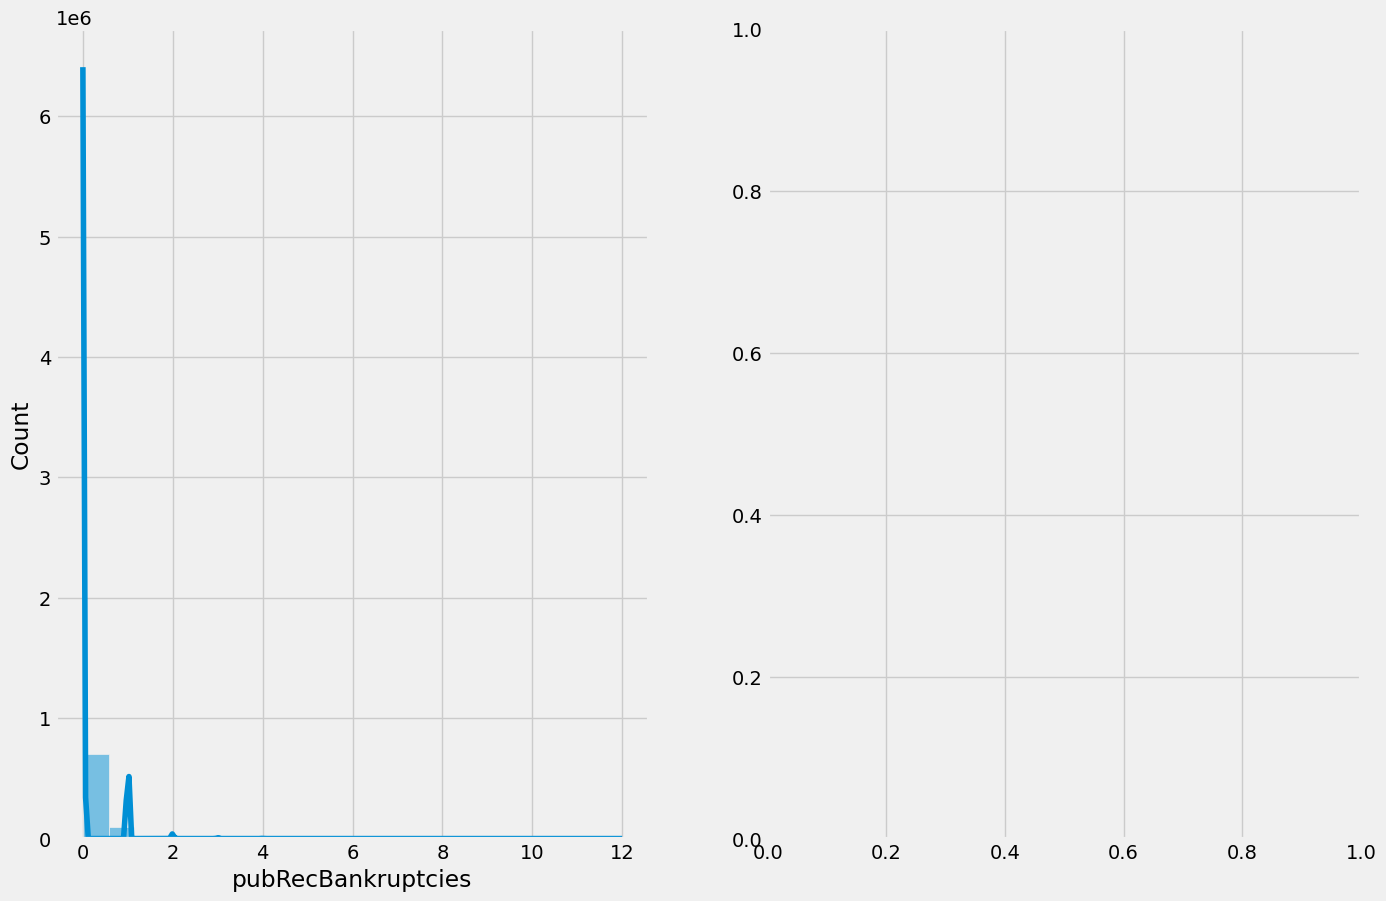

In [50]:
fig, ax = plt.subplots(1, 2, figsize = (15, 10))
sns.histplot(x = 'pubRecBankruptcies', kde = True,data = train_df, label = 'pubRecBankruptcies', ax = ax[0])
plt.show()
plt.close()

## 1.21 revolBal 信贷周转余额合计——定量

In [51]:
train_df['revolBal'].value_counts()

0.0        3945
4784.0       73
6325.0       66
6312.0       65
6018.0       65
           ... 
61603.0       1
87824.0       1
44968.0       1
83611.0       1
69702.0       1
Name: revolBal, Length: 71116, dtype: int64

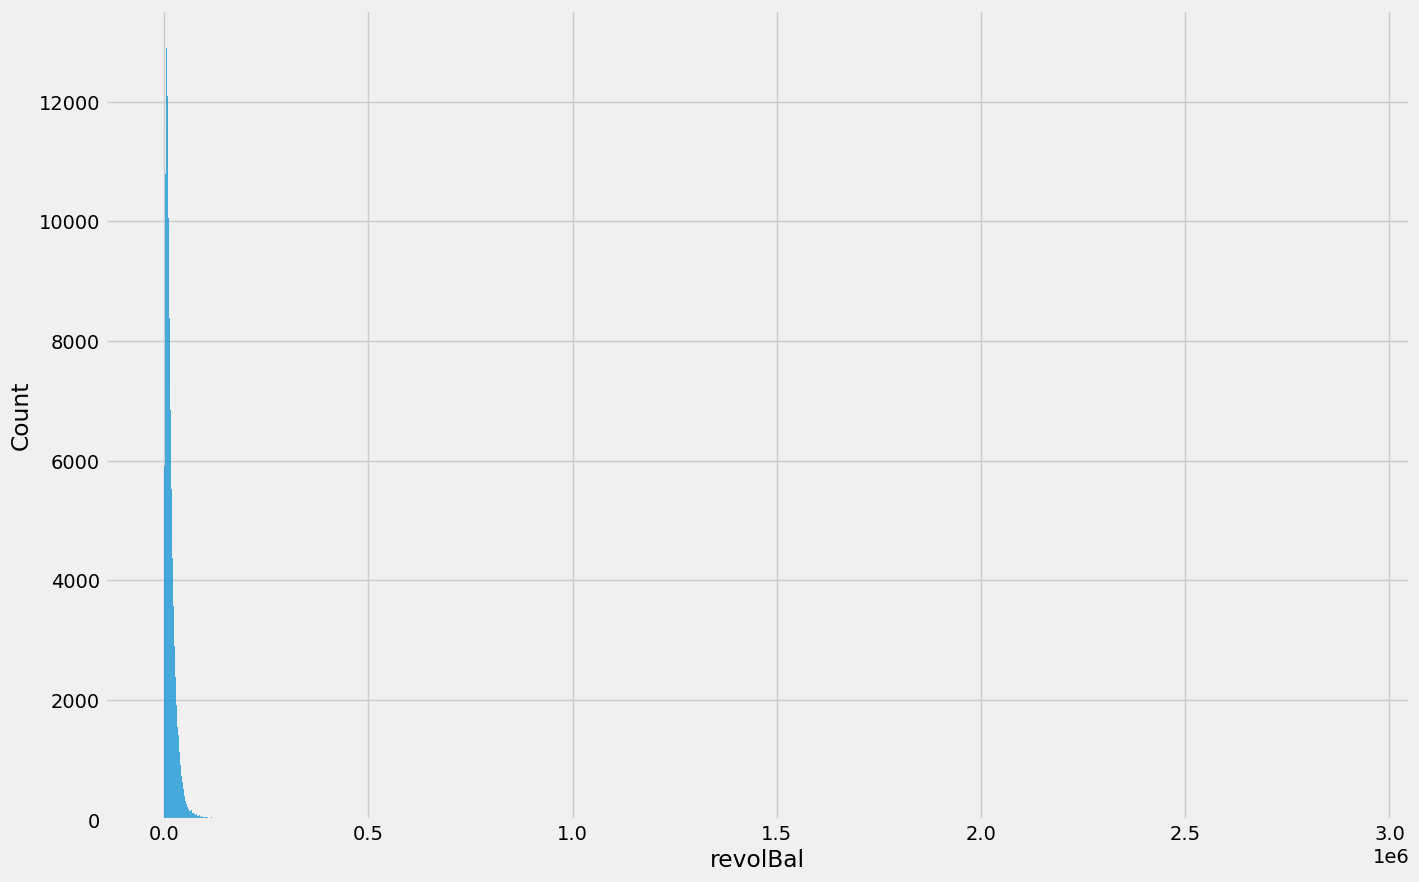

In [52]:
fig,ax = plt.subplots(figsize = (15, 10))
sns.histplot(x = 'revolBal', data = train_df, label = 'revolBal', ax = ax )
plt.show()
plt.close()

## 1.22 revolUtil 循环额度利用率，或借款人使用的相对于所有可用循环信贷的信贷金额——定量

In [53]:
train_df['revolUtil'].value_counts()

0.00      4170
55.00     1589
61.00     1579
57.00     1575
53.00     1575
          ... 
120.90       1
107.90       1
49.69        1
0.75         1
136.40       1
Name: revolUtil, Length: 1286, dtype: int64

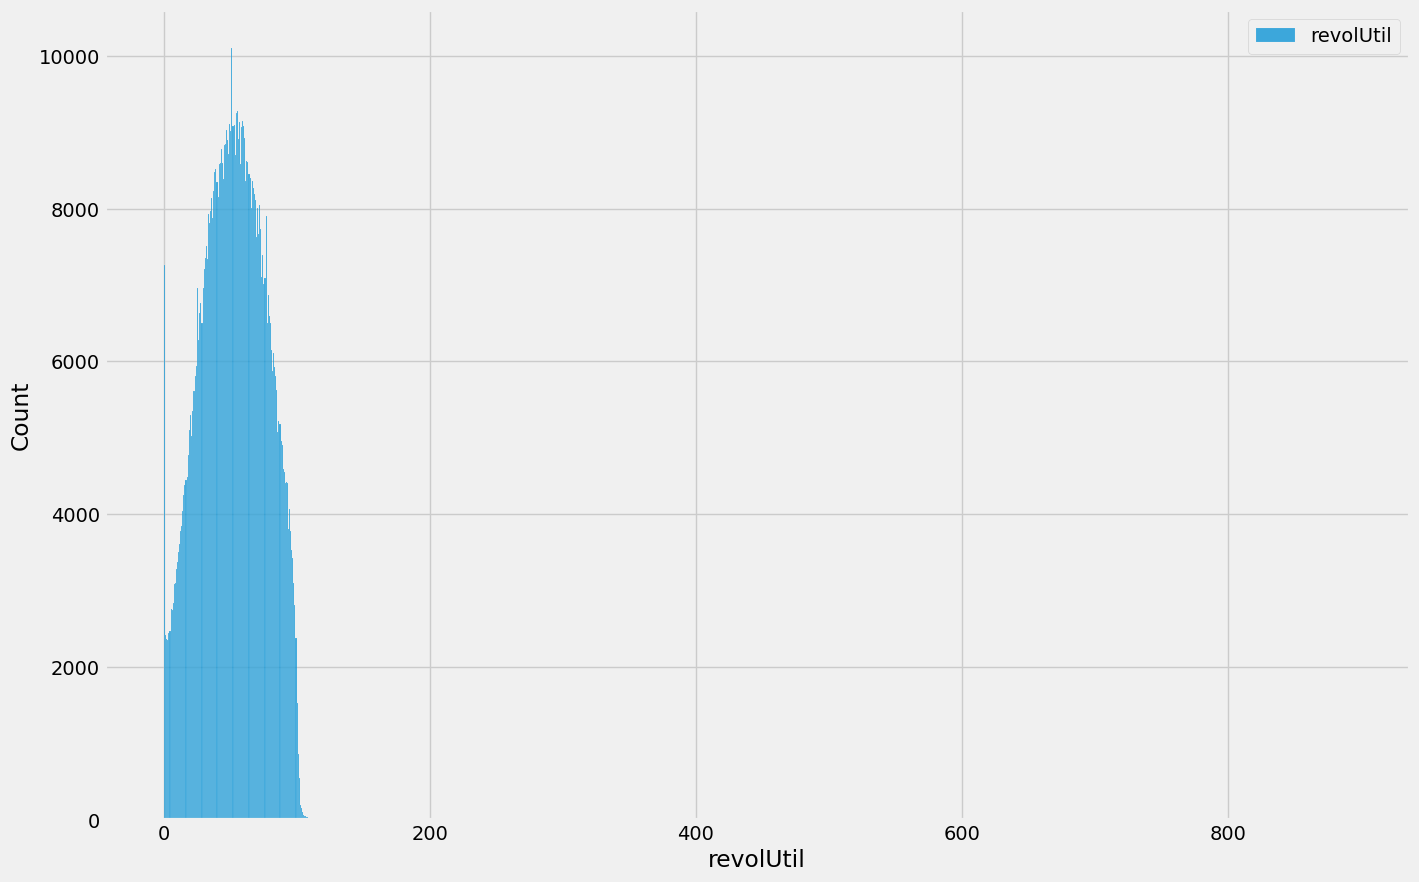

In [54]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.histplot(x= 'revolUtil', data = train_df, label = 'revolUtil', ax = ax)
ax.legend()
plt.show()
plt.close()

## 1.23 totalAcc 当前的信用额度总数——定量
---信用的总额度，与是否违约的分布大致一样

In [55]:
train_df['totalAcc'].value_counts()

20.0     28956
21.0     28820
19.0     28697
22.0     28671
18.0     28188
         ...  
151.0        1
146.0        1
103.0        1
141.0        1
129.0        1
Name: totalAcc, Length: 134, dtype: int64

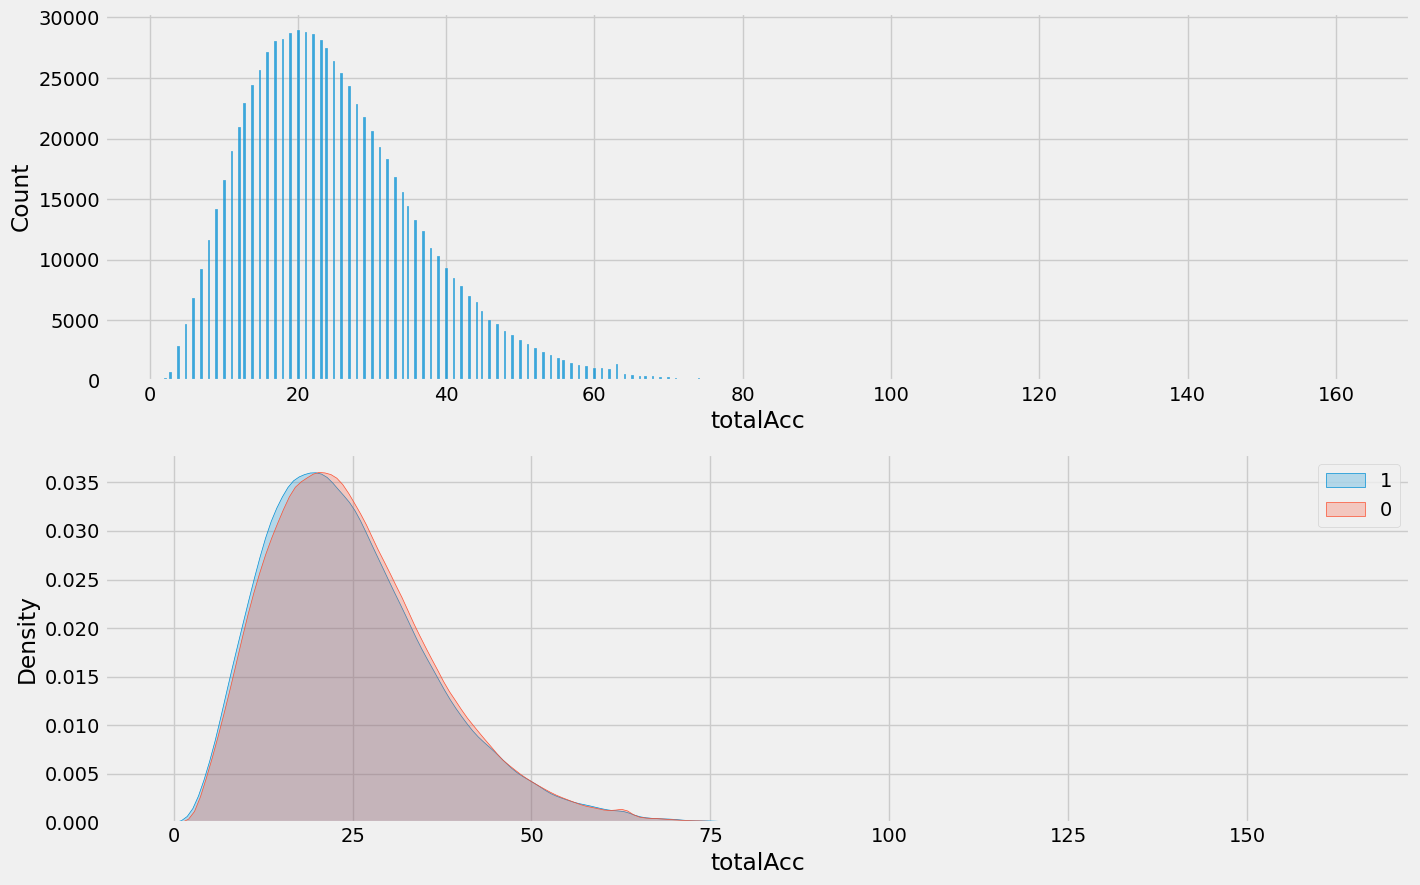

In [56]:
fig, ax = plt.subplots(2,1,figsize = (15, 10))
sns.histplot(x = 'totalAcc', data = train_df,label = 'totalAcc', ax = ax[0])

sns.kdeplot(data = train_df[train_df['isDefault'] == 1],shade=True, x = 'totalAcc', label = '1',ax = ax[1])
sns.kdeplot(data = train_df[train_df['isDefault'] == 0],shade=True, x = 'totalAcc', label = '0',ax = ax[1])
ax[1].legend()
plt.show()
plt.close()

## 1.24 initialListStatus 贷款的初始列表状态——定类
---不同的状态中，违约比例一样

In [57]:
train_df['initialListStatus'].value_counts()

0    466438
1    333562
Name: initialListStatus, dtype: int64

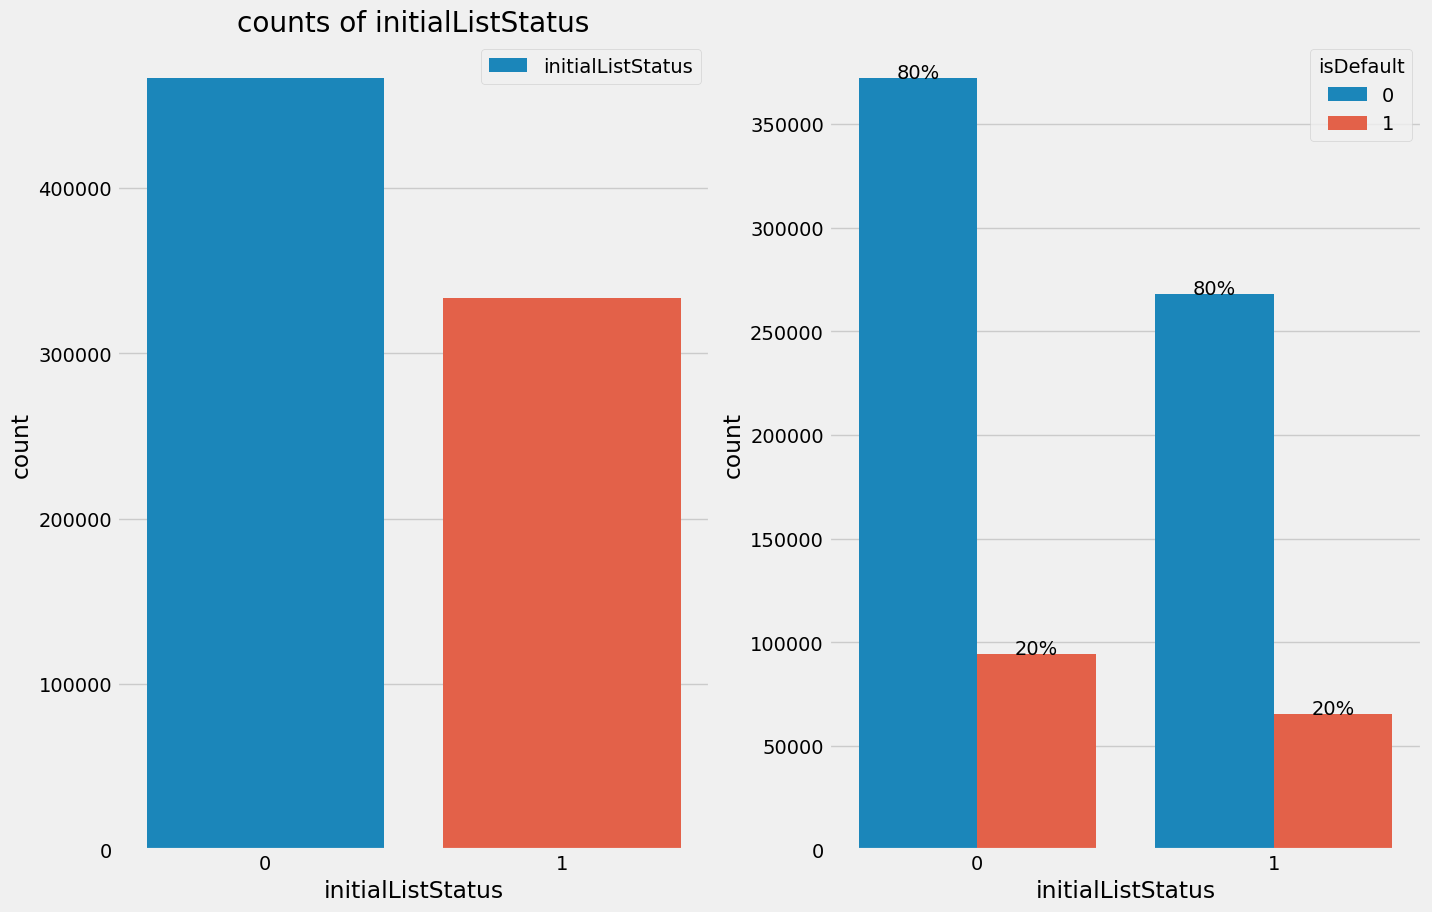

In [58]:
fig, ax = plt.subplots(1, 2, figsize = (15, 10))
sns.countplot(x = 'initialListStatus', data = train_df, label = 'initialListStatus',ax = ax[0])
ax[0].legend()
ax[0].set_title(label = 'counts of initialListStatus')
sns.countplot(x = 'initialListStatus', data = train_df, hue = 'isDefault',ax = ax[1])
PlotCount(ax[1])
plt.show()
plt.close()

## 1.25 applicationType 表明贷款是个人申请还是与两个共同借款人的联合申请——定类

In [59]:
train_df['applicationType'].value_counts()

0    784586
1     15414
Name: applicationType, dtype: int64

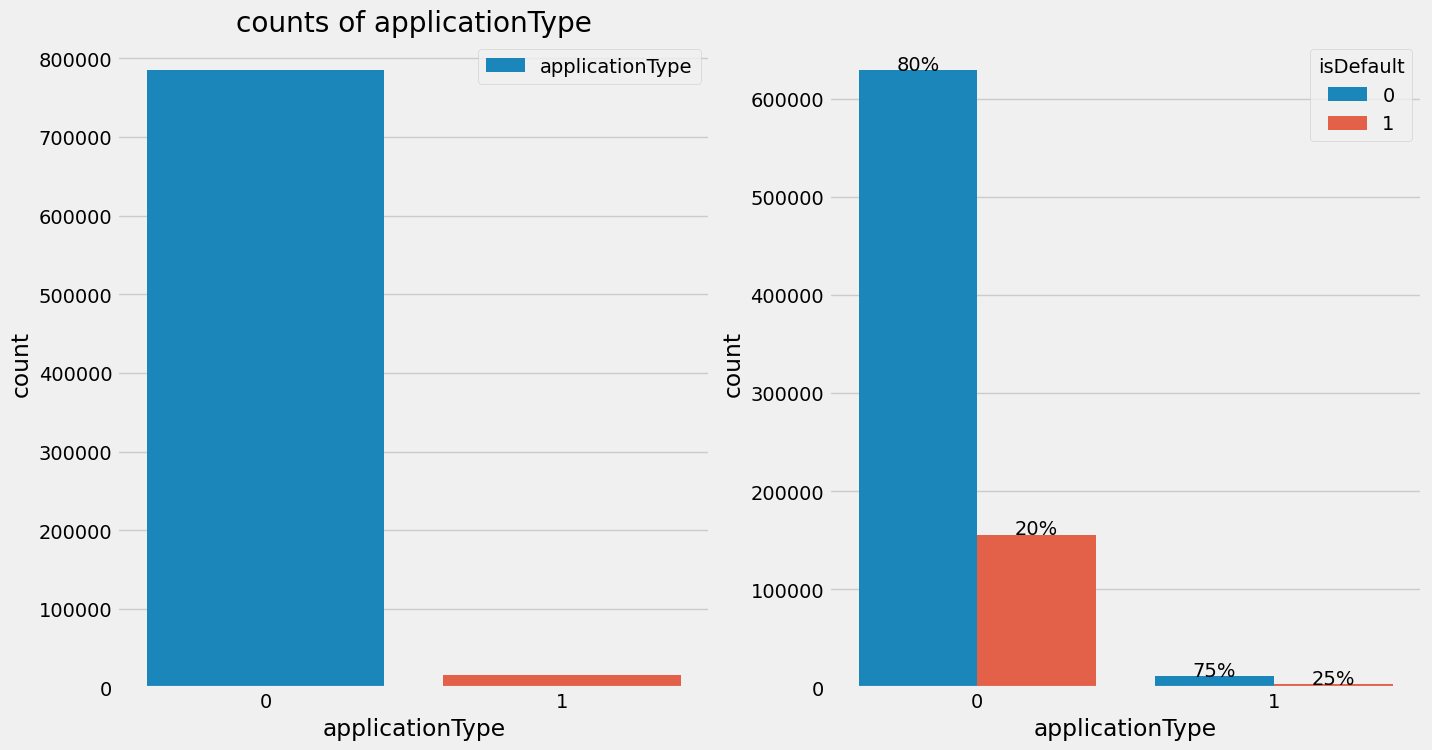

In [60]:
fig, ax = plt.subplots(1, 2, figsize = (15, 8))
sns.countplot(x = 'applicationType', data = train_df, label = 'applicationType', ax = ax[0])

ax[0].legend()
ax[0].set_title(label = "counts of applicationType")
sns.countplot(x = 'applicationType', data = train_df, hue = 'isDefault', ax = ax[1])
PlotCount(ax[1])

## 1.26 earliesCreditLine 最早报告的信用额度开立的月份——定类

In [61]:
train_df['earliesCreditLine'].value_counts()

Aug-2001    5567
Sep-2003    5403
Aug-2002    5403
Oct-2001    5258
Aug-2000    5246
            ... 
Feb-1960       1
Sep-1957       1
Jul-1955       1
May-1960       1
Jan-1946       1
Name: earliesCreditLine, Length: 720, dtype: int64

## 1.27 title 借款人提供的贷款名称——定类

In [62]:
train_df['title'].value_counts()

0.0        393334
4.0        148211
5.0         44748
6.0         39742
3.0         14432
            ...  
59059.0         1
53052.0         1
42638.0         1
28481.0         1
33369.0         1
Name: title, Length: 39644, dtype: int64

ERROR:root:Internal Python error in the inspect module.

Below is the traceback from this internal error.




Traceback (most recent call last):

  File "D:\anaconda\envs\kaggle\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

    exec(code_obj, self.user_global_ns, self.user_ns)

  File "C:\Users\Mr.Li\AppData\Local\Temp\ipykernel_15484\1516544143.py", line 2, in <module>

    sns.displot(x = 'title', data = train_df, label = 'title',ax = ax[0])

  File "D:\anaconda\envs\kaggle\lib\site-packages\seaborn\distributions.py", line 2274, in displot

    p.plot_univariate_histogram(**hist_kws)

  File "D:\anaconda\envs\kaggle\lib\site-packages\seaborn\distributions.py", line 571, in plot_univariate_histogram

    **artist_kws,

  File "D:\anaconda\envs\kaggle\lib\site-packages\matplotlib\__init__.py", line 1414, in inner

    return func(ax, *map(sanitize_sequence, args), **kwargs)

  File "D:\anaconda\envs\kaggle\lib\site-packages\matplotlib\axes\_axes.py", line 2412, in bar

    self.add_patch(r)

  File "D:\anaconda\envs\kaggle\lib\site-packages\matplotlib\axes\_base.

TypeError: object of type 'NoneType' has no len()

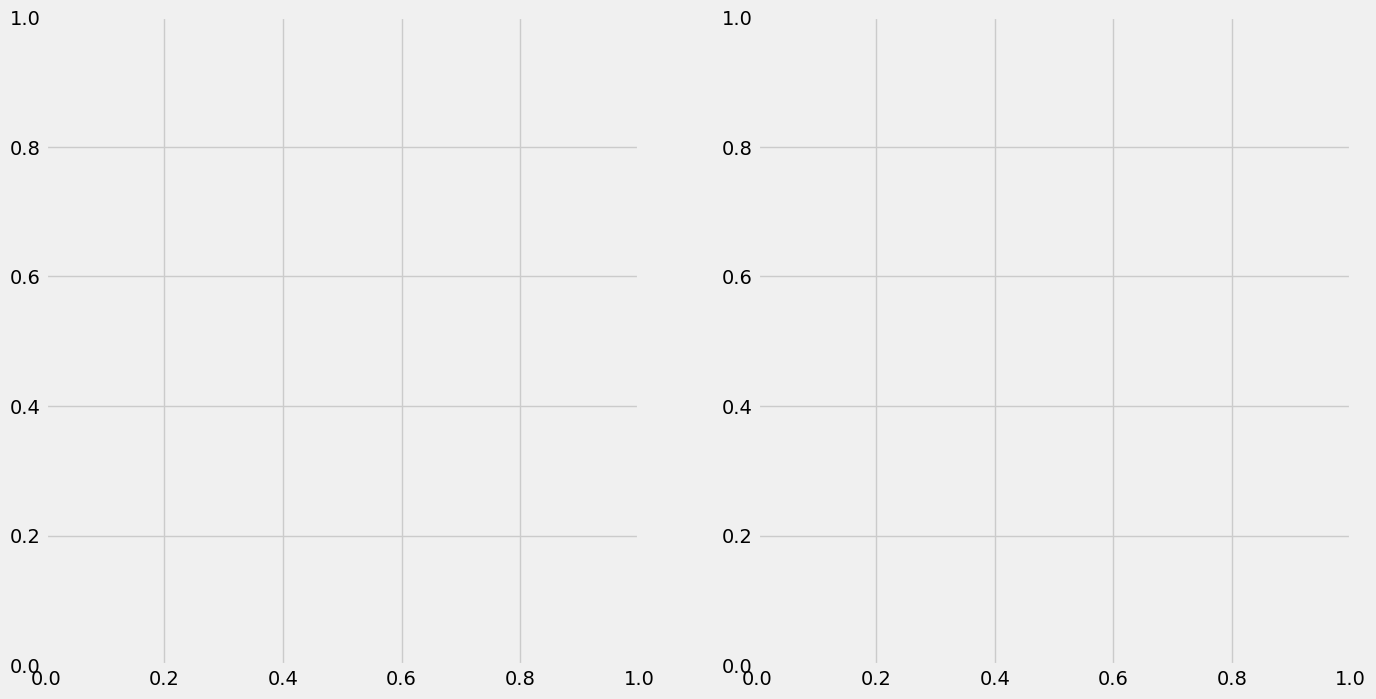

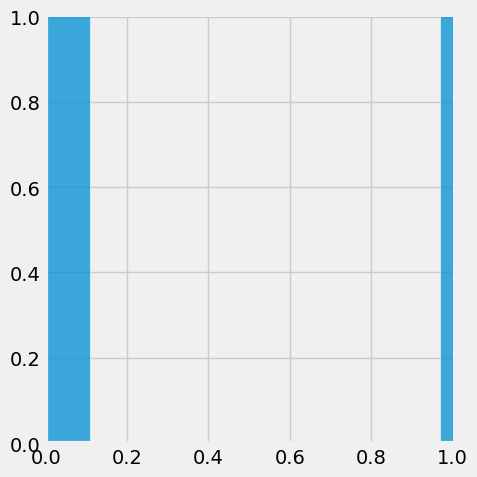

In [89]:
fig, ax = plt.subplots(1, 2, figsize = (15, 8))
sns.displot(x = 'title', data = train_df, label = 'title',ax = ax[0])
ax[0].legend()
ax[0].set_title(label = "distribution of title")
plt.show()
plt.close()

## 1.28 policyCode 公开可用的策略_代码=1，新产品不公开可用的策略_代码=2——定类
---从数据集看，该特征全为1，初步可以判断为“无关特征”

In [63]:
train_df['policyCode'].value_counts()

1.0    800000
Name: policyCode, dtype: int64

## 1.29 匿名特征
---匿名特征都是数值型，可以通过分布图查看

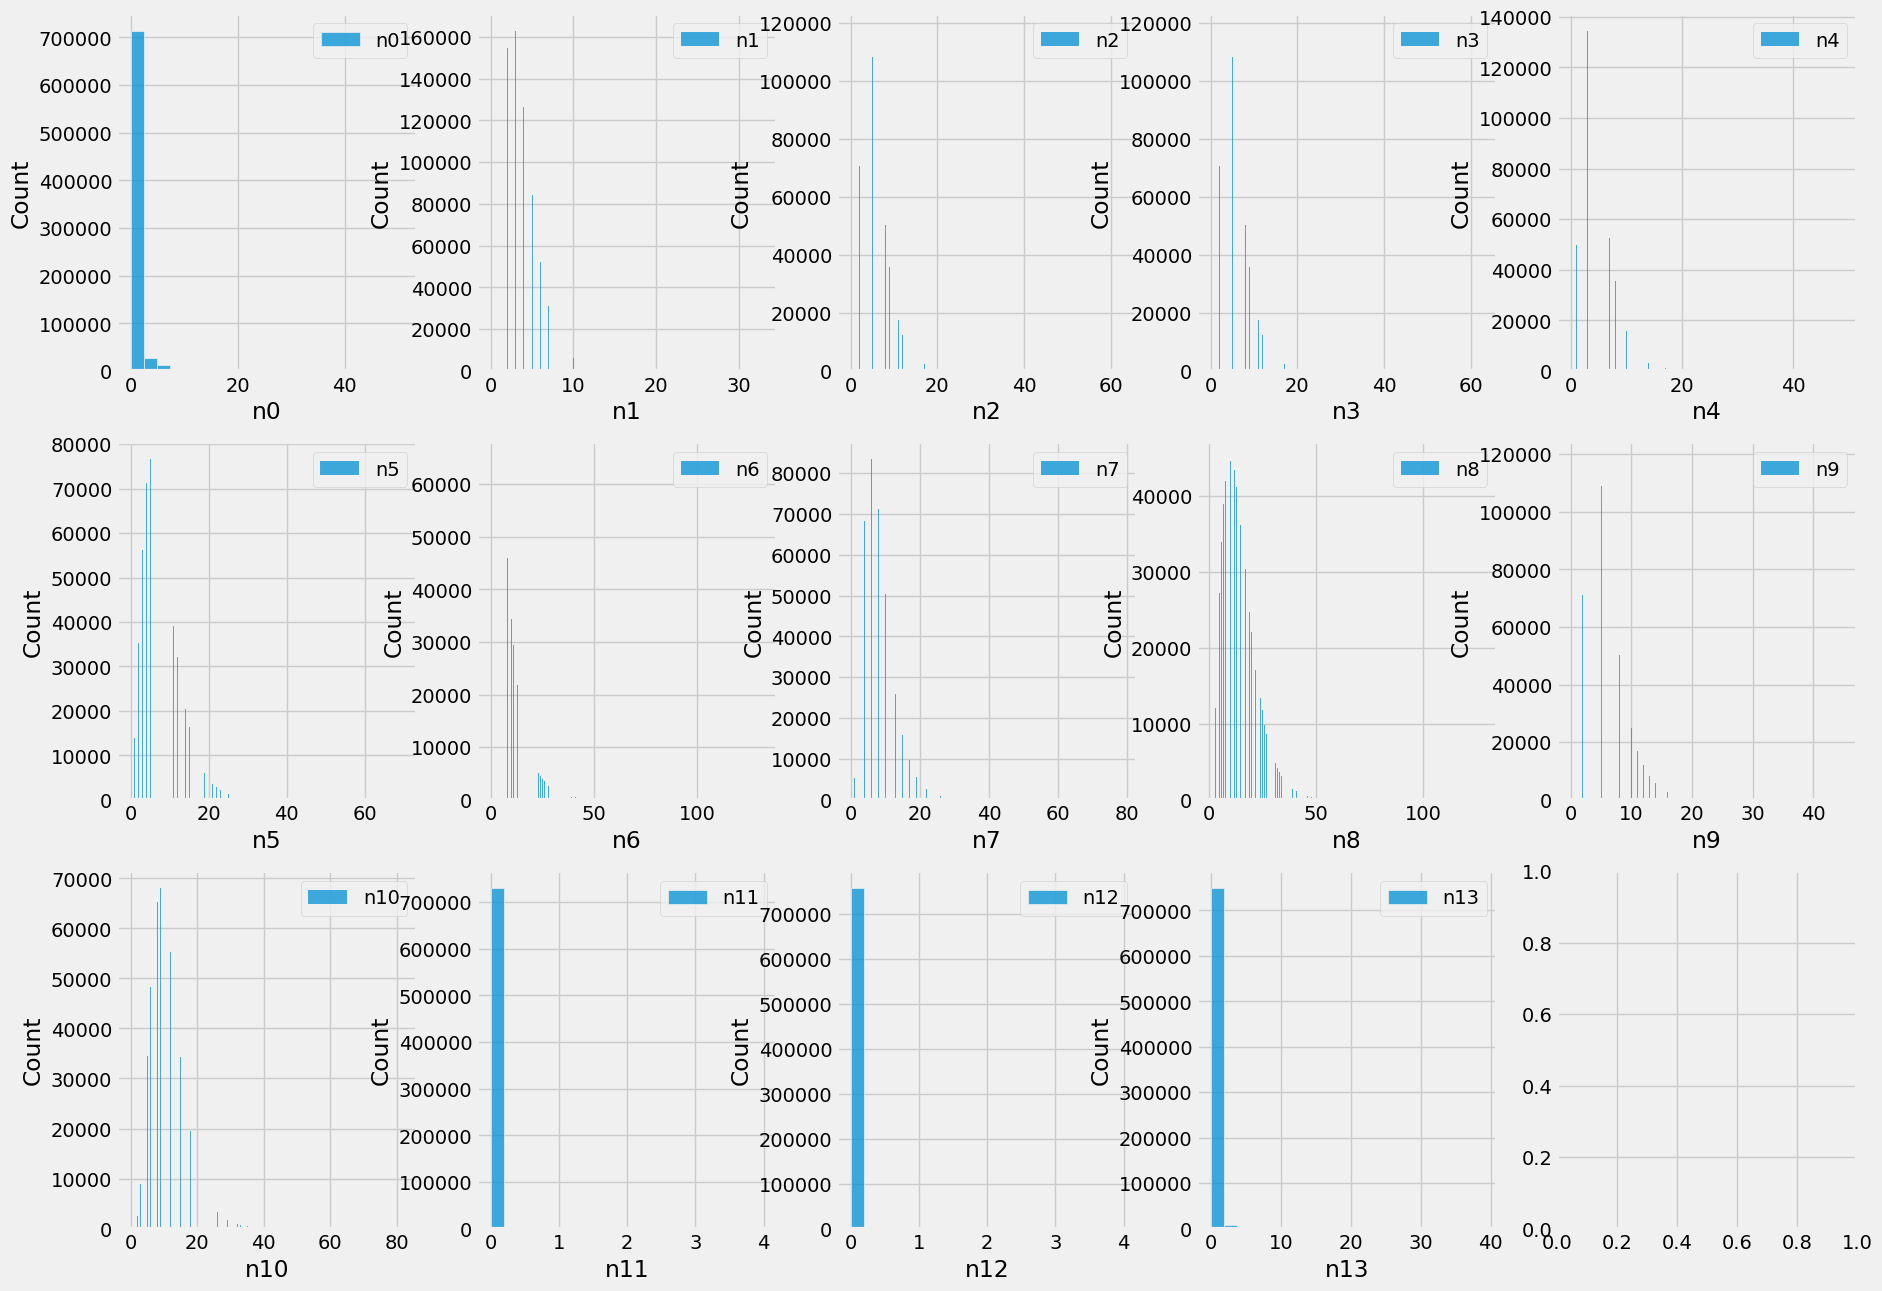

In [64]:
fig, ax = plt.subplots(3, 5,figsize = (20, 15))
for idx in range(15):
    xx = int(idx / 5)
    yy = idx % 5
    sns.histplot(train_df['n'+ str(idx)], ax = ax[xx,yy], label = 'n'+str(idx))
    ax[xx, yy].legend()
    plt.cla()

# 2. Feature Engining

## 2.1 划分训练集和测试集

In [3]:
temp_train_data = train_df.copy()
label = train_df['isDefault']
train_df.drop(['isDefault'], axis = 1, inplace = True)

In [4]:
train_X, test_X, train_y, test_y = train_test_split(train_df,label,test_size = 0.3,random_state = 42 )

## 2.2 类别型特征

In [87]:
def FeatureIsNull(col):
    sum_train = train_X[col].isnull().sum()
    sum_test= test_X[col].isnull().sum()
    print("特征{}\n".format(col))
    print("训练集缺失值情况：",sum_train)
    print("测试集缺失值情况：",sum_test)

### 2.2.1 verificationStatus        验证状态
---原始数据是自然数编码，无法得知是否包含序列信息，若后续使用树模型，则无需做处理

In [5]:
train_X['verificationStatus'].value_counts()

1    216710
2    174199
0    169091
Name: verificationStatus, dtype: int64

In [69]:
test_X['verificationStatus'].isnull().sum()

0

In [6]:
train_X['verificationStatus'].isnull().sum()

0

### 2.2.2 purpose                   贷款用途类别

In [7]:
train_X['purpose'].value_counts()

0     325034
4     122751
2      36368
5      32515
3      12176
9       6447
1       6384
8       6037
10      3949
7       3820
6       3032
12       953
11       399
13       135
Name: purpose, dtype: int64

In [8]:
train_X['purpose'].isnull().sum()

0

In [70]:
test_X['purpose'].isnull().sum()

0

### 2.2.3 postCode                  邮编

In [11]:
train_X['postCode'].value_counts()

134.0    6289
19.0     6047
51.0     5684
31.0     5099
4.0      4982
         ... 
925.0       1
922.0       1
915.0       1
839.0       1
938.0       1
Name: postCode, Length: 925, dtype: int64

In [13]:
train_X['postCode'].isnull().sum()

1

In [68]:
"""采用众数填充训练集和测试集的postCode缺失值"""
imputer = SimpleImputer(strategy = 'most_frequent')
train_X['postCode'] = imputer.fit(train_X[['postCode']].values)
train_X['postCode'] = imputer.transform(train_X[['postCode']].values)
test_X['postCode'] = imputer.transform(test_X[['postCode']].values)

### 2.2.4 regionCode                地区编码

In [71]:
train_X['regionCode'].value_counts()

8     81929
14    46202
13    45617
21    39678
2     21356
30    19979
0     18991
19    18318
3     18002
9     15931
7     15708
23    14678
10    13772
12    12917
26    12872
22    12459
18    12041
4      9921
11     9054
24     8919
32     8494
38     8369
36     8166
27     7296
17     7011
5      6689
35     6652
20     6399
43     5366
42     5084
15     4625
37     4274
45     4182
16     3068
44     2801
28     2797
33     2657
6      2401
39     2078
40     1620
31     1600
25     1498
34     1464
48     1314
41     1230
1      1225
29     1065
47      837
49      707
46      682
50        5
Name: regionCode, dtype: int64

In [72]:
train_X['regionCode'].isnull().sum()

0

In [73]:
test_X['regionCode'].isnull().sum()

0

### 2.2.4 initialListStatus         贷款的初始列表状态

In [74]:
train_X['initialListStatus'].value_counts()

0    326655
1    233345
Name: initialListStatus, dtype: int64

In [88]:
FeatureIsNull("initialListStatus")

特征initialListStatus



训练集缺失值情况： 0

测试集缺失值情况： 0


### 2.2.5 applicationType           表明贷款是个人申请还是与两个共同借款人的联合申请

In [89]:
train_X['applicationType'].value_counts()

0    549197
1     10803
Name: applicationType, dtype: int64

In [90]:
FeatureIsNull('applicationType')

特征applicationType



训练集缺失值情况： 0

测试集缺失值情况： 0


### 2.2.6 title                     借款人提供的贷款名称

In [92]:
train_X['title'].value_counts()

0.0        275433
4.0        103586
5.0         31239
6.0         27901
3.0          9992
            ...  
13659.0         1
21006.0         1
11422.0         1
13093.0         1
59694.0         1
Name: title, Length: 29306, dtype: int64

In [93]:
FeatureIsNull('title')

特征title



训练集缺失值情况： 1

测试集缺失值情况： 0


In [97]:
imputer = SimpleImputer(strategy = 'most_frequent')
imputer.fit(train_X[['title']])
train_X['title'] = imputer.transform(train_X[['title']])

In [98]:
FeatureIsNull('title')

特征title



训练集缺失值情况： 0

测试集缺失值情况： 0
